In [1]:
# general packages
import os
import numpy as np
import pandas as pd

# image-related packages
import seaborn as sns
#import cv2
from PIL import Image
from matplotlib.pyplot import imshow
from matplotlib.image import imread
from matplotlib import pyplot as plt

# tensorflow 2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# this line is needed for Mac OS
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
os.getcwd()

'/home/ubuntu18/python3/c/Springboard/Springboard/Capstone_project_2'

In [4]:
print("tensorflow: ", tf.__version__)
#print("cv2: ", cv2.__version__, "\n")

for i in range(len(tf.config.list_physical_devices())):
    print(tf.config.list_physical_devices()[i])

tensorflow:  2.1.0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')


In [5]:
ls -ltrh ./data/*.mov

-rw-r--r-- 1 ubuntu18 ubuntu18 630M feb 16 16:16 ./data/zero-to-five.mov
-rw-r--r-- 1 ubuntu18 ubuntu18 291M mar 24 11:59 ./data/zero-to-five-new.mov


In [6]:
# extract jpeg frames from .mov file: already done

# vidcap = cv2.VideoCapture('./Data/zero-to-five.mov')
# success,image = vidcap.read()
# count = 0

# while success:
#     cv2.imwrite("./Data/frame%d.jpg" % count, image)     # save frame as JPEG file      
#     success,image = vidcap.read()
#     if count%30 == 0:  # 30 frames per second for .mov video file
#         print('Reading the frame: ', count)
#     count += 1

# print('The last frame is: ', count)

In [7]:
# move manually the extracted frames to corresponding categories
# bases on frame number and time used for recording the 0 to 5 signs

In [8]:
# move 30% of all jpgs from /train to corresponding /test categories
# by simply moving to /test all frames that end with digits 0, 4 and 7

# mv ./data/train/0/*0.jpg ./data/test/0/
# mv ./data/train/0/*4.jpg ./data/test/0/
# mv ./data/train/0/*7.jpg ./data/test/0/
# mv ./data/train/1/*0.jpg ./data/test/1/
# mv ./data/train/1/*4.jpg ./data/test/1/
# mv ./data/train/1/*7.jpg ./data/test/1/
# mv ./data/train/2/*0.jpg ./data/test/2/
# mv ./data/train/2/*4.jpg ./data/test/2/
# mv ./data/train/2/*7.jpg ./data/test/2/
# mv ./data/train/3/*0.jpg ./data/test/3/
# mv ./data/train/3/*4.jpg ./data/test/3/
# mv ./data/train/3/*7.jpg ./data/test/3/
# mv ./data/train/4/*0.jpg ./data/test/4/
# mv ./data/train/4/*4.jpg ./data/test/4/
# mv ./data/train/4/*7.jpg ./data/test/4/
# mv ./data/train/5/*0.jpg ./data/test/5/
# mv ./data/train/5/*4.jpg ./data/test/5/
# mv ./data/train/5/*7.jpg ./data/test/5/

In [9]:
!du -h ./data/train

425M	./data/train/5
481M	./data/train/4
489M	./data/train/2
515M	./data/train/1
489M	./data/train/3
2,4G	./data/train


In [10]:
!du -h ./data/test

185M	./data/test/5
208M	./data/test/4
213M	./data/test/2
225M	./data/test/1
213M	./data/test/3
1,1G	./data/test


In [11]:
!find ./data/train -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

2864 ./data/train/5
3137 ./data/train/4
3273 ./data/train/2
3283 ./data/train/3
3521 ./data/train/1
16081 ./data/train


In [12]:
!find ./data/test -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

1226 ./data/test/5
1337 ./data/test/4
1401 ./data/test/2
1409 ./data/test/3
1512 ./data/test/1
6888 ./data/test


After moving train and test data to corresponding classes, there are:

- 10068 training jpgs (including 6 directories so total = 10061)
- 4310 test jpgs (including 6 directories so total = 4303)
- 1.3 GB used for training jpgs
- 572 MB used for test jpgs

The number of files for each of the 5 classes in /train and /test is relatively equal with the exception of the classes 4 and 5 where I had to delete more jpgs due to recording issues.

In [13]:
image0 = imread('./data/train/1/frame10201.jpg')
type(image0)

numpy.ndarray

In [14]:
image0.shape

(720, 1080, 3)

In [15]:
# This function will plot training images in the form of a grid with 1 row and 5 columns 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [16]:
samples=[]
#samples.append(imread('./data/train/0/frame16768.jpg')) # sample class 0 -- class 0 was removed
samples.append(imread('./data/train/1/frame10118.jpg')) # sample class 1
samples.append(imread('./data/train/2/frame1.jpg')) # sample class 2
samples.append(imread('./data/train/3/frame3398.jpg')) # sample class 3
samples.append(imread('./data/train/4/frame6765.jpg')) # sample class 4
samples.append(imread('./data/train/5/frame13421.jpg')) # sample class 5

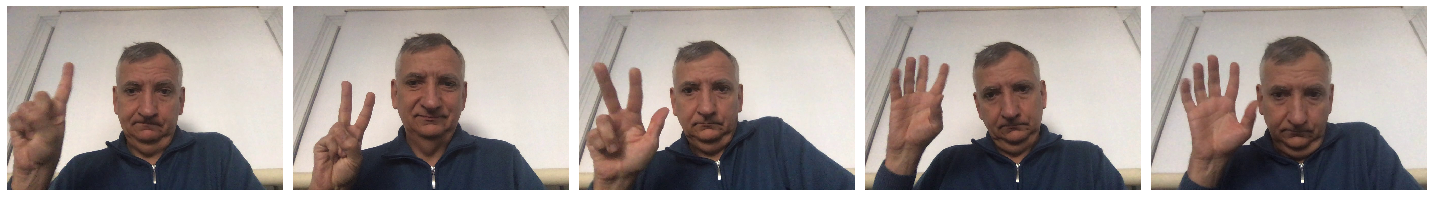

In [17]:
# Print the classes inside each jpeg sample
#font      = cv2.FONT_HERSHEY_SIMPLEX
#position  = (20,700)
#fontScale = 2
#fontColor = (255,255,255)
#lineType  = 5

#cv2.putText(samples[0], 'Class: 0', position, font, fontScale, fontColor, lineType)  -- class 0 was removed
#cv2.putText(samples[0], 'Class: 1', position, font, fontScale, fontColor, lineType)
#cv2.putText(samples[1], 'Class: 2', position, font, fontScale, fontColor, lineType)
#cv2.putText(samples[2], 'Class: 3', position, font, fontScale, fontColor, lineType)
#cv2.putText(samples[3], 'Class: 4', position, font, fontScale, fontColor, lineType)
#cv2.putText(samples[4], 'Class: 5', position, font, fontScale, fontColor, lineType)

plotImages(samples)

In [18]:
# parameters
train_dir = './data/train'
test_dir = './data/test'
batch_size = 16
epochs = 10
# will rescale all jpeg images to 255x255 for having a reasonable time for the training
IMG_HEIGHT = 255
IMG_WIDTH = 255

image_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

In [19]:
image_gen = ImageDataGenerator(rotation_range=10, # randomly rotate the image with <=10 degrees
                               #width_shift_range=0.10, # Shift the pic width by a max of 10%
                               #height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Normalize the image
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [20]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 16073 images belonging to 5 classes.


In [21]:
test_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=test_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                             )

Found 6880 images belonging to 5 classes.


The number of /train images is 10061, the number of /test images is 4303, as counted earlier with the bash commands

In [22]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [23]:
# This function will plot images in the form of a grid with 1 row and 5 columns 
# where images are placed in each column.
def plotImages(images_arr, labels_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    i=1
    for label in labels_arr:
        print("Image", i, " one-hot encoded class:", label)
        i+=1

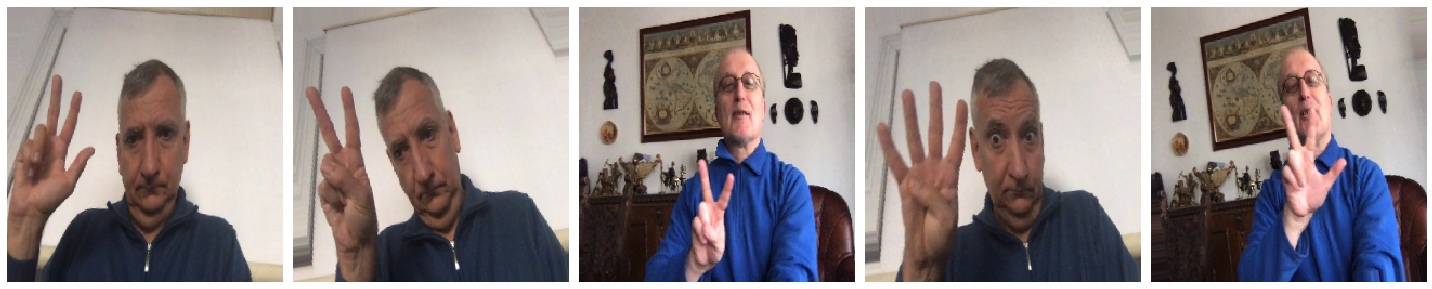

Image 1  one-hot encoded class: [0. 0. 1. 0. 0.]
Image 2  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 3  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 4  one-hot encoded class: [0. 0. 0. 1. 0.]
Image 5  one-hot encoded class: [0. 0. 1. 0. 0.]


In [24]:
plotImages(sample_training_images[:5], sample_training_labels[:5])

ImageDataGenerator did the following:

- rotated the image by no more than of +- 20%
- no horizontal or vertical shift because the hand is close to one edge in some jpgs
- normalized the 0...255 values to the float interval 0...1
- rescaled the image to 255 x 255 pixels
- returned the image itself and the one-hot encoded class based on the class directory

In [25]:
sample_training_images[0].shape

(255, 255, 3)

In [26]:
print(sample_training_images[0].min(), sample_training_images[0].max())

0.05547662 0.9978333


In [27]:
train_data_gen.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}

In [28]:
test_data_gen.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}

The classes are 0, 1, 2, 3, 4, 5 for both train and test data

In [29]:
image_shape

(255, 255, 3)

# Model 1, one Conv2D layer, 16 filters

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)
#use patience=2 since the data and the CNN model itself is noisy
# and may have a decreased performance for one epoch

In [31]:
model1 = Sequential()

model1.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(3, 3)))
#model1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
#model1.add(MaxPooling2D(pool_size=(3, 3)))
#model1.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
#model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())

model1.add(Dense(255))
model1.add(Activation('relu'))

model1.add(Dense(5, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [32]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 255, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 115600)            0         
_________________________________________________________________
dense (Dense)                (None, 255)               29478255  
_________________________________________________________________
activation (Activation)      (None, 255)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1280      
Total params: 29,479,983
Trainable params: 29,479,983
Non-trainable params: 0
____________________________________________

In [33]:
history = model1.fit(train_data_gen,
                     epochs=epochs,
                     validation_data=test_data_gen,
                     callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1005 steps, validate for 430 steps
Epoch 1/10
1005/1005 [==============================] - 383s 381ms/step - loss: 0.8625 - accuracy: 0.6885 - val_loss: 0.5052 - val_accuracy: 0.8110
Epoch 2/10
1005/1005 [==============================] - 381s 379ms/step - loss: 0.3666 - accuracy: 0.8630 - val_loss: 0.2530 - val_accuracy: 0.9022
Epoch 3/10
1005/1005 [==============================] - 382s 381ms/step - loss: 0.2407 - accuracy: 0.9119 - val_loss: 0.1568 - val_accuracy: 0.9404
Epoch 4/10
1005/1005 [==============================] - 382s 380ms/step - loss: 0.1678 - accuracy: 0.9414 - val_loss: 0.2233 - val_accuracy: 0.9314
Epoch 5/10
1005/1005 [==============================] - 380s 378ms/step - loss: 0.1245 - accuracy: 0.9566 - val_loss: 0.0961 - val_accuracy: 0.9669
Epoch 6/10
1005/1005 [==============================] - 381s 379ms/step - loss: 0.0999 - accuracy: 0.9659 - val_loss: 0.0944 - val_accuracy: 0.9674
Epoch 7/10
1005/1

In [34]:
model1.save('model1-one-CNN-layer-16-filters.h5')

In [66]:
#model1 = load_model('model1-one-CNN-layer-16-filters.h5')

In [67]:
losses_model1 = pd.DataFrame(model1.history.history)
losses_model1

loss  accuracy  val_loss  val_accuracy
0  0.862150  0.688546  0.505167      0.811047
1  0.366540  0.863000  0.253028      0.902180
2  0.240612  0.911902  0.156823      0.940407
3  0.167783  0.941392  0.223297      0.931395
4  0.124455  0.956573  0.096077      0.966860
5  0.099905  0.965906  0.094429      0.967442
6  0.088094  0.973247  0.105976      0.970785
7  0.077772  0.977727  0.031741      0.989826
8  0.073561  0.979842  0.054033      0.980378
9  0.054057  0.984881  0.027891      0.991279

In [38]:
print(model1.metrics_names)
print(model1.evaluate(test_data_gen,verbose=0))

['loss', 'accuracy']
  ...
    to  
  ['...']
[0.030571298635703008, 0.9905523]


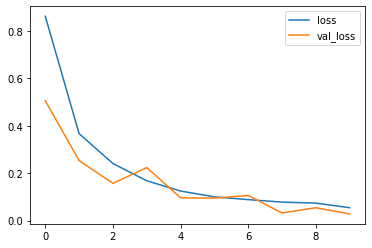

In [39]:
losses_model1[['loss','val_loss']].plot()

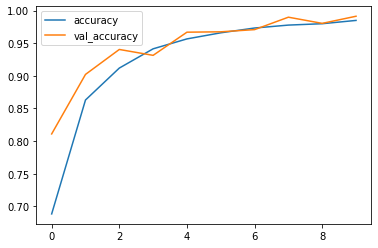

In [40]:
losses_model1[['accuracy','val_accuracy']].plot()

In [42]:
test_images, test_labels = next(test_data_gen)

In [43]:
test_labels

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [46]:
labels = []
for result in test_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)

In [47]:
predictions = model1.predict_classes(test_images)

In [48]:
print("labels type:", type(labels), "predictions type:", type(predictions))

labels type: <class 'numpy.ndarray'> predictions type: <class 'numpy.ndarray'>


In [49]:
for labels_vs_predictions in list(zip(labels, predictions)):
    print(labels_vs_predictions, end=' ')

(3, 3) (2, 2) (3, 3) (2, 2) (4, 4) (2, 2) (2, 2) (2, 2) (2, 2) (2, 3) (0, 0) (1, 1) (3, 3) (2, 2) (0, 0) (1, 1) 

In [50]:
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.88      0.93         8
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         1

    accuracy                           0.94        16
   macro avg       0.95      0.97      0.96        16
weighted avg       0.95      0.94      0.94        16



In [51]:
confusion_matrix(labels, predictions)

array([[2, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 7, 1, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 1]])

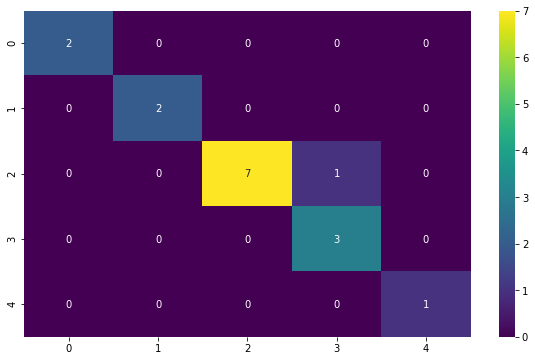

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions), cmap='viridis', annot=True)

In [ ]:
# For the first batch of 16 images, all the classes were correctly predicted with one exception.
# Accuracy for this batch was 94%

In [58]:
# I shall test the model on pictures from different people, dressed differently, using different backgrounds.
# A problem is that the train and test datasets were taken in very similar conditions
# and if conditions change, the results will get worse.

In [43]:
test1_dir = './data/test1'
batch_size = 200

In [44]:
test1_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=test1_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 200 images belonging to 5 classes.


In [61]:
test1_images, test1_labels = next(test1_data_gen)

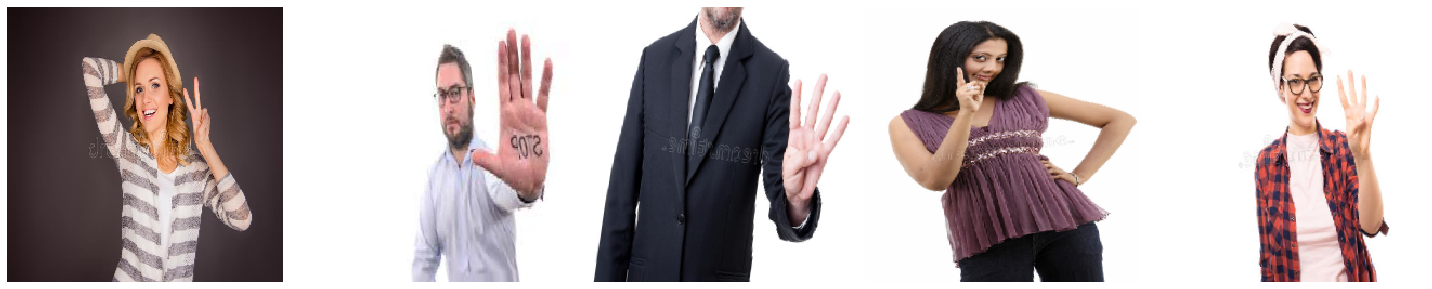

Image 1  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 2  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 3  one-hot encoded class: [0. 0. 0. 1. 0.]
Image 4  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 5  one-hot encoded class: [0. 0. 0. 1. 0.]


In [62]:
plotImages(test1_images[:5], test1_labels[:5])

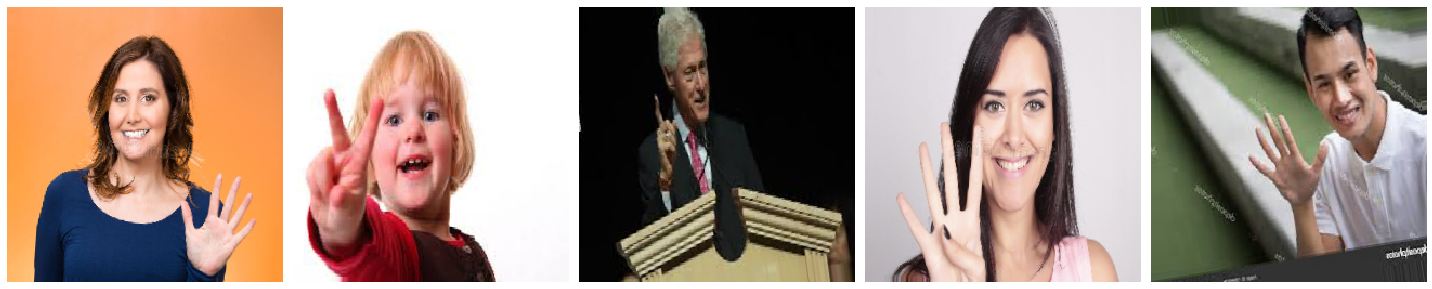

Image 1  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 2  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 3  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 4  one-hot encoded class: [0. 0. 0. 1. 0.]
Image 5  one-hot encoded class: [0. 0. 0. 0. 1.]


In [63]:
plotImages(test1_images[5:10], test1_labels[5:10])

In [65]:
predictions1 = model1.predict_classes(test1_images)

In [68]:
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)

In [69]:
for labels_vs_predictions in list(zip(labels, predictions1)):
    print(labels_vs_predictions, end=' ')

(1, 3) (4, 4) (3, 4) (0, 4) (3, 3) (4, 4) (1, 2) (0, 2) (3, 4) (4, 1) (2, 1) (4, 4) (3, 4) (3, 3) (3, 4) (0, 4) (2, 4) (4, 4) (3, 4) (3, 4) (1, 3) (1, 1) (1, 4) (4, 2) (0, 0) (4, 4) (2, 4) (1, 4) (3, 4) (2, 4) (2, 4) (0, 4) (1, 2) (3, 4) (2, 1) (1, 1) (1, 2) (1, 4) (4, 4) (4, 1) (3, 3) (4, 1) (1, 4) (0, 4) (2, 3) (4, 1) (3, 4) (1, 1) (3, 4) (4, 4) (0, 2) (3, 2) (2, 3) (4, 1) (1, 1) (0, 4) (3, 4) (4, 4) (4, 4) (3, 3) (2, 2) (2, 4) (1, 4) (4, 4) (0, 3) (2, 4) (2, 4) (2, 3) (3, 2) (2, 4) (4, 0) (3, 4) (2, 3) (0, 2) (0, 4) (4, 3) (4, 1) (4, 4) (2, 4) (3, 3) (2, 4) (0, 3) (4, 1) (4, 4) (2, 4) (2, 3) (1, 1) (3, 4) (1, 4) (0, 4) (1, 2) (0, 4) (1, 3) (2, 3) (2, 4) (0, 2) (2, 4) (2, 4) (4, 3) (0, 4) (2, 1) (1, 2) (3, 4) (4, 4) (4, 4) (2, 3) (0, 4) (0, 4) (1, 3) (1, 1) (2, 4) (1, 1) (4, 4) (0, 1) (3, 1) (1, 1) (3, 4) (0, 1) (0, 2) (3, 1) (1, 4) (2, 2) (1, 4) (0, 1) (1, 1) (4, 2) (4, 3) (2, 4) (3, 3) (1, 4) (4, 4) (4, 4) (1, 0) (0, 2) (1, 4) (1, 4) (2, 4) (3, 1) (0, 4) (2, 4) (1, 1) (0, 4) (2, 4)

In [70]:
print(classification_report(labels, predictions1))

              precision    recall  f1-score   support

           0       0.17      0.03      0.04        40
           1       0.30      0.30      0.30        40
           2       0.08      0.05      0.06        40
           3       0.29      0.23      0.25        40
           4       0.21      0.50      0.29        40

    accuracy                           0.22       200
   macro avg       0.21      0.22      0.19       200
weighted avg       0.21      0.22      0.19       200



In [71]:
confusion_matrix(labels, predictions1)

array([[ 1,  7, 10,  2, 20],
       [ 1, 12,  7,  7, 13],
       [ 1,  5,  2,  9, 23],
       [ 0,  6,  4,  9, 21],
       [ 3, 10,  3,  4, 20]])

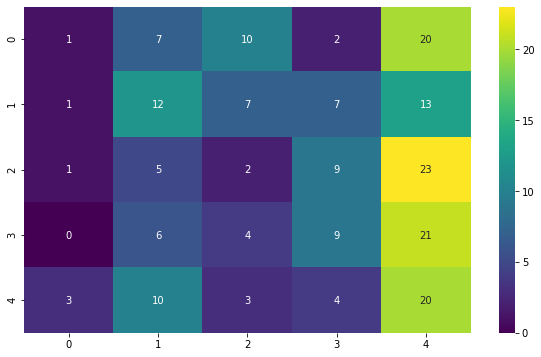

In [72]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions1), cmap='viridis', annot=True)

In [73]:
# the result is not too good, the 0.22 accuracy is marginally superior
# to the 0.2 accuracy for a random choice of one of the five classes
# From the heatmap it is clear that the model is biased towards class 4
# and to a lesser extent towards class 2 (that is 5 fingers and 2 fingers)

# Model 2, one Conv2D layer, 32 filters

In [33]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model2.add(MaxPooling2D(pool_size=(3, 3)))
#model2.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
#model2.add(MaxPooling2D(pool_size=(3, 3)))
#model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
#model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())

model2.add(Dense(255))
model2.add(Activation('relu'))

model2.add(Dense(5, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [34]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 255, 255, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 231200)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 255)               58956255  
_________________________________________________________________
activation_1 (Activation)    (None, 255)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 1280      
Total params: 58,958,431
Trainable params: 58,958,431
Non-trainable params: 0
__________________________________________

In [35]:
history = model2.fit_generator(train_data_gen,
                               epochs=epochs,
                               validation_data=test_data_gen,
                               callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1005 steps, validate for 430 steps
Epoch 1/10
1005/1005 [==============================] - 386s 384ms/step - loss: 1.5157 - accuracy: 0.6931 - val_loss: 0.4162 - val_accuracy: 0.8388
Epoch 2/10
1005/1005 [==============================] - 382s 380ms/step - loss: 0.2997 - accuracy: 0.8884 - val_loss: 0.2686 - val_accuracy: 0.9010
Epoch 3/10
1005/1005 [==============================] - 381s 379ms/step - loss: 0.1754 - accuracy: 0.9376 - val_loss: 0.1153 - val_accuracy: 0.9571
Epoch 4/10
1005/1005 [==============================] - 381s 379ms/step - loss: 0.1408 - accuracy: 0.9535 - val_loss: 0.1064 - val_accuracy: 0.9625
Epoch 5/10
1005/1005 [==============================] - 380s 378ms/step - loss: 0.1085 - accuracy: 0.9669 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 6/10
1005/1005 [==============================] - 382s 380ms/step - loss: 0.0824 - accuracy: 0.9757 - val_loss: 0.0537 - val_accuracy: 0.9810
Epoch 7/10
1005/1

In [36]:
model2.save('model2-one-CNN-layer-32-filters.h5')

In [38]:
losses_model2 = pd.DataFrame(model2.history.history)
losses_model2

loss  accuracy  val_loss  val_accuracy
0  1.515855  0.693088  0.416187      0.838808
1  0.299719  0.888446  0.268606      0.901017
2  0.175490  0.937597  0.115299      0.957122
3  0.140817  0.953525  0.106367      0.962500
4  0.108501  0.966901  0.033422      0.988663
5  0.082417  0.975673  0.053654      0.980959
6  0.071532  0.978971  0.025206      0.992006
7  0.065052  0.982020  0.027300      0.989680
8  0.059531  0.984384  0.015538      0.995058
9  0.047315  0.986001  0.023104      0.992733

In [39]:
print(model2.metrics_names)
print(model2.evaluate(test_data_gen,verbose=0))

['loss', 'accuracy']
  ...
    to  
  ['...']
[0.026389006760326024, 0.99331397]


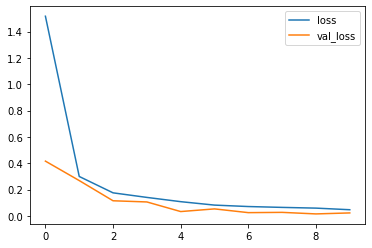

In [40]:
losses_model2[['loss','val_loss']].plot()

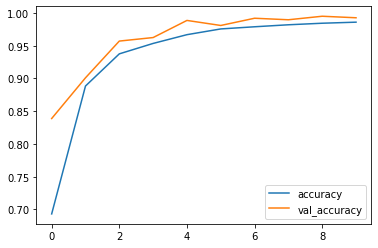

In [41]:
losses_model2[['accuracy','val_accuracy']].plot()

In [45]:
test1_images, test1_labels = next(test1_data_gen)

In [46]:
predictions2 = model2.predict_classes(test1_images)

In [47]:
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)

In [48]:
for labels_vs_predictions in list(zip(labels, predictions2)):
    print(labels_vs_predictions, end=' ')

(0, 1) (2, 4) (0, 4) (4, 0) (2, 4) (0, 4) (4, 2) (2, 4) (2, 4) (0, 4) (0, 2) (4, 4) (4, 4) (3, 4) (4, 1) (0, 2) (3, 4) (1, 4) (2, 3) (2, 3) (1, 3) (4, 4) (3, 4) (2, 4) (3, 4) (3, 3) (4, 2) (0, 4) (3, 2) (3, 3) (4, 3) (4, 4) (1, 1) (2, 4) (2, 2) (2, 4) (1, 4) (4, 2) (3, 2) (0, 1) (1, 4) (4, 4) (1, 3) (2, 4) (0, 4) (0, 4) (2, 4) (0, 2) (1, 2) (1, 4) (0, 2) (1, 1) (3, 4) (2, 4) (0, 2) (1, 4) (0, 1) (4, 4) (0, 4) (4, 1) (4, 4) (4, 2) (3, 1) (3, 4) (2, 4) (3, 2) (3, 3) (0, 4) (0, 4) (1, 4) (3, 4) (0, 1) (2, 4) (3, 4) (1, 2) (3, 4) (1, 1) (0, 1) (4, 4) (2, 2) (1, 3) (2, 4) (2, 4) (2, 3) (2, 3) (3, 4) (1, 3) (3, 4) (1, 1) (3, 4) (0, 3) (2, 4) (1, 2) (4, 4) (1, 3) (4, 4) (1, 2) (0, 4) (4, 4) (0, 4) (2, 3) (2, 4) (4, 4) (0, 2) (2, 3) (1, 2) (4, 4) (4, 2) (1, 4) (3, 4) (3, 4) (4, 0) (3, 4) (0, 2) (1, 4) (3, 4) (4, 4) (3, 4) (0, 4) (0, 2) (2, 4) (2, 3) (0, 4) (4, 3) (0, 1) (1, 0) (2, 4) (2, 1) (1, 1) (2, 3) (3, 2) (4, 4) (4, 4) (0, 4) (2, 2) (4, 4) (0, 4) (1, 1) (0, 4) (1, 4) (0, 2) (4, 4) (1, 4)

In [49]:
print(classification_report(labels, predictions2))

              precision    recall  f1-score   support

           0       0.12      0.03      0.04        40
           1       0.26      0.17      0.21        40
           2       0.11      0.10      0.11        40
           3       0.26      0.17      0.21        40
           4       0.24      0.62      0.35        40

    accuracy                           0.22       200
   macro avg       0.20      0.22      0.18       200
weighted avg       0.20      0.22      0.18       200



In [50]:
confusion_matrix(labels, predictions2)

array([[ 1,  8, 10,  2, 19],
       [ 2,  7, 10,  6, 15],
       [ 1,  5,  4,  9, 21],
       [ 1,  4,  5,  7, 23],
       [ 3,  3,  6,  3, 25]])

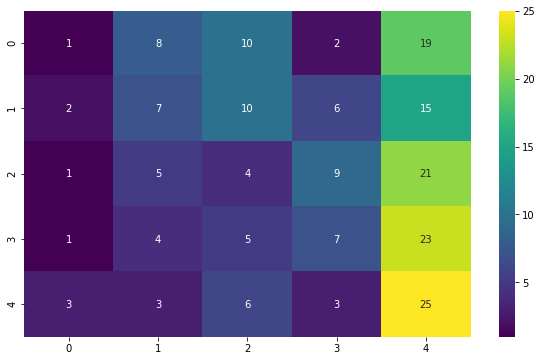

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions2), cmap='viridis', annot=True)

In [92]:
predicted_class, counts = np.unique(predictions2, return_counts=True)
df = pd.DataFrame(data = list(zip(predicted_class, counts)), columns=['Class', 'Predicted_number'])
df.set_index('Class')

Predicted_number
Class                  
0                     8
1                    27
2                    35
3                    27
4                   103

In [77]:
# The overall performance of model2 is almost identical with the one for model 1
# but the predicted classes are not so biased towasds class 4
# It looks like one hidden CNN layer is not enough

# Model 3, two Conv2D layers with 16 and 32 filters

In [78]:
model3 = Sequential()

model3.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model3.add(MaxPooling2D(pool_size=(3, 3)))
model3.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model3.add(MaxPooling2D(pool_size=(3, 3)))
#model3.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
#model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(255))
model3.add(Activation('relu'))

model3.add(Dense(5, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [79]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 255, 255, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 85, 85, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 255)               6397695   
_________________________________________________________________
activation_2 (Activation)    (None, 255)              

In [80]:
history = model3.fit_generator(train_data_gen,
                               epochs=epochs,
                               validation_data=test_data_gen,
                               callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1005 steps, validate for 430 steps
Epoch 1/10
1005/1005 [==============================] - 383s 381ms/step - loss: 0.7650 - accuracy: 0.7185 - val_loss: 0.3032 - val_accuracy: 0.8850
Epoch 2/10
1005/1005 [==============================] - 382s 380ms/step - loss: 0.2478 - accuracy: 0.9102 - val_loss: 0.1557 - val_accuracy: 0.9477
Epoch 3/10
1005/1005 [==============================] - 384s 382ms/step - loss: 0.1317 - accuracy: 0.9520 - val_loss: 0.0743 - val_accuracy: 0.9750
Epoch 4/10
1005/1005 [==============================] - 383s 381ms/step - loss: 0.0877 - accuracy: 0.9691 - val_loss: 0.1200 - val_accuracy: 0.9645
Epoch 5/10
1005/1005 [==============================] - 382s 380ms/step - loss: 0.0618 - accuracy: 0.9795 - val_loss: 0.0308 - val_accuracy: 0.9882
Epoch 6/10
1005/1005 [==============================] - 383s 381ms/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.0350 - val_accuracy: 0.9878
Epoch 7/10
1005/1

In [231]:
history = model.fit_generator(train_data_gen,
                              epochs=epochs,
                              validation_data=test_data_gen,
                              callbacks=[early_stop])

Epoch 1/10
629/629 [==============================] - 1516s 2s/step - loss: 0.4702 - accuracy: 0.8340 - val_loss: 0.1422 - val_accuracy: 0.9526
Epoch 2/10
629/629 [==============================] - 1517s 2s/step - loss: 0.1115 - accuracy: 0.9606 - val_loss: 0.0828 - val_accuracy: 0.9733
Epoch 3/10
629/629 [==============================] - 1519s 2s/step - loss: 0.0738 - accuracy: 0.9755 - val_loss: 0.0337 - val_accuracy: 0.9891
Epoch 4/10
629/629 [==============================] - 1674s 3s/step - loss: 0.0513 - accuracy: 0.9857 - val_loss: 0.0232 - val_accuracy: 0.9928
Epoch 5/10
629/629 [==============================] - 1859s 3s/step - loss: 0.0302 - accuracy: 0.9902 - val_loss: 0.0125 - val_accuracy: 0.9951
Epoch 6/10
629/629 [==============================] - 1583s 3s/step - loss: 0.0257 - accuracy: 0.9923 - val_loss: 0.0213 - val_accuracy: 0.9935
Epoch 7/10
629/629 [==============================] - 1940s 3s/step - loss: 0.0178 - accuracy: 0.9944 - val_loss: 0.0272 - val_accuracy:

In [81]:
model3.save('model3-two-CNN-layers.h5')

In [ ]:
#model3 = load_model('model3-two-CNN-layers.h5')

In [83]:
losses_model3 = pd.DataFrame(model3.history.history)
losses_model3

loss  accuracy  val_loss  val_accuracy
0  0.765175  0.718472  0.303236      0.885029
1  0.247799  0.910222  0.155721      0.947674
2  0.131679  0.952031  0.074280      0.975000
3  0.087723  0.969079  0.119967      0.964535
4  0.061700  0.979469  0.030838      0.988227
5  0.046856  0.985068  0.035018      0.987791
6  0.034033  0.988677  0.024530      0.991715
7  0.032687  0.990045  0.021841      0.993023
8  0.030713  0.991103  0.019397      0.993895
9  0.025255  0.992721  0.015280      0.993895

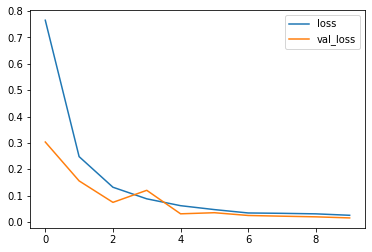

In [84]:
losses_model3[['loss','val_loss']].plot()

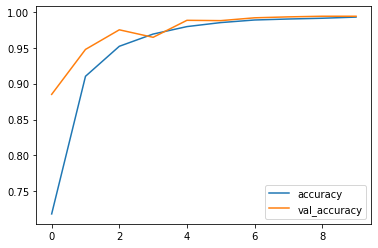

In [85]:
losses_model3[['accuracy','val_accuracy']].plot()

In [86]:
predictions3 = model3.predict_classes(test1_images)

In [87]:
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)

In [88]:
for labels_vs_predictions in list(zip(labels, predictions3)):
    print(labels_vs_predictions, end=' ')

(0, 1) (2, 4) (0, 4) (4, 4) (2, 4) (0, 3) (4, 2) (2, 3) (2, 4) (0, 4) (0, 2) (4, 4) (4, 4) (3, 4) (4, 1) (0, 2) (3, 4) (1, 2) (2, 4) (2, 4) (1, 4) (4, 3) (3, 4) (2, 3) (3, 3) (3, 2) (4, 2) (0, 4) (3, 2) (3, 3) (4, 4) (4, 4) (1, 4) (2, 1) (2, 2) (2, 4) (1, 2) (4, 4) (3, 4) (0, 3) (1, 3) (4, 3) (1, 3) (2, 4) (0, 3) (0, 4) (2, 4) (0, 2) (1, 2) (1, 1) (0, 2) (1, 1) (3, 3) (2, 4) (0, 2) (1, 4) (0, 4) (4, 4) (0, 4) (4, 1) (4, 4) (4, 4) (3, 4) (3, 2) (2, 3) (3, 2) (3, 4) (0, 4) (0, 4) (1, 4) (3, 1) (0, 3) (2, 4) (3, 4) (1, 4) (3, 4) (1, 4) (0, 2) (4, 1) (2, 2) (1, 4) (2, 4) (2, 4) (2, 3) (2, 4) (3, 4) (1, 3) (3, 4) (1, 4) (3, 4) (0, 3) (2, 2) (1, 1) (4, 4) (1, 4) (4, 4) (1, 3) (0, 4) (4, 2) (0, 4) (2, 4) (2, 4) (4, 4) (0, 2) (2, 4) (1, 2) (4, 2) (4, 4) (1, 4) (3, 4) (3, 4) (4, 1) (3, 1) (0, 3) (1, 3) (3, 4) (4, 4) (3, 4) (0, 4) (0, 2) (2, 3) (2, 3) (0, 4) (4, 4) (0, 1) (1, 3) (2, 4) (2, 1) (1, 4) (2, 4) (3, 3) (4, 2) (4, 1) (0, 4) (2, 3) (4, 4) (0, 4) (1, 4) (0, 4) (1, 4) (0, 4) (4, 1) (1, 4)

In [89]:
print(classification_report(labels, predictions3))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.17      0.10      0.12        40
           2       0.11      0.07      0.09        40
           3       0.16      0.17      0.17        40
           4       0.20      0.53      0.29        40

    accuracy                           0.17       200
   macro avg       0.13      0.17      0.13       200
weighted avg       0.13      0.17      0.13       200



In [90]:
confusion_matrix(labels, predictions3)

array([[ 0,  2,  9,  8, 21],
       [ 0,  4,  4, 13, 19],
       [ 0,  6,  3, 10, 21],
       [ 0,  5,  6,  7, 22],
       [ 1,  7,  6,  5, 21]])

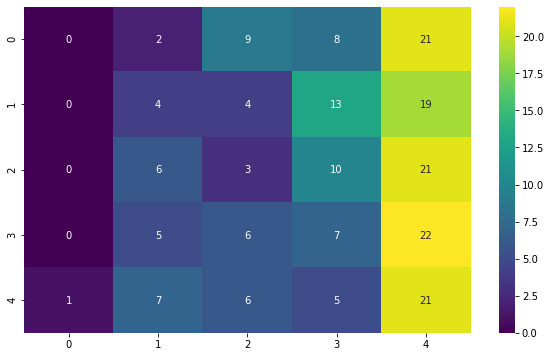

In [91]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions3), cmap='viridis', annot=True)

In [172]:
np.sum(confusion_matrix(labels, predictions3), axis=0)

array([  1,  24,  28,  43, 104])

In [95]:
# The situation is worse than before, the accuracy is now 17%
# and the model is more biased towards class 4

# Next idea: use cv2.Canny function to detect edges

By using this function, the output shows (almost) only the edges:

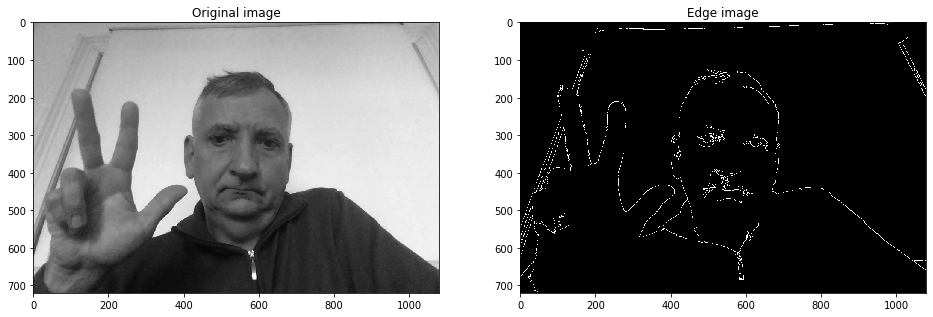

In [32]:
img1 = cv2.imread('./data/train/3/frame3508.jpg',0)
param1 = 20
param2 = 150
img_edges = cv2.Canny(img1,param1,param2)

plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img1, cmap='gray')
plt.title('Original image')
plt.subplot(122),plt.imshow(img_edges, cmap='gray')
plt.title('Edge image')

plt.show()

In [33]:
pwd

'/Users/bogdan/python3/c/Springboard/Springboard/Capstone_Project_2'

Create a similar /data directory with cv2.Canny applied, named /data_edges

The original /data directory is not modified

In [34]:
dir_source = './data/train/'
dir_dest = './data_edges/train/'
dir_list = ['1/', '2/', '3/', '4/', '5/']

In [35]:
param1 = 20
param2 = 150

for dir_list_item in dir_list:
    files_list = os.listdir(dir_source+dir_list_item)
    for file_name in files_list:
        img = cv2.imread(dir_source+dir_list_item+file_name,0)
        img_edges = cv2.Canny(img,param1,param2)
        cv2.imwrite(dir_dest+dir_list_item+file_name, img_edges)

In [36]:
dir_source = './data/test/'
dir_dest = './data_edges/test/'
dir_list = ['1/', '2/', '3/', '4/', '5/']

In [37]:
for dir_list_item in dir_list:
    files_list = os.listdir(dir_source+dir_list_item)
    for file_name in files_list:
        img = cv2.imread(dir_source+dir_list_item+file_name,0)
        img_edges = cv2.Canny(img,param1,param2)
        cv2.imwrite(dir_dest+dir_list_item+file_name, img_edges)

Continue by using the same steps as in the beginning

In [114]:
!du -h ./data/train

425M	./data/train/5
481M	./data/train/4
489M	./data/train/2
515M	./data/train/1
489M	./data/train/3
2,4G	./data/train


In [115]:
!du -h ./data_edges/train

482M	./data_edges/train/4
338M	./data_edges/train/2
466M	./data_edges/train/1
450M	./data_edges/train/3
1,7G	./data_edges/train


After applying cv2.Canny there is less information because only the edges are shown. Therefore, the jpg files can be compressed better and the overall size is reduced

In [96]:
!du -h ./data/test

185M	./data/test/5
208M	./data/test/4
213M	./data/test/2
225M	./data/test/1
213M	./data/test/3
1,1G	./data/test


In [97]:
!du -h ./data_edges/test

163M	./data_edges/test/5
211M	./data_edges/test/4
203M	./data_edges/test/2
205M	./data_edges/test/1
198M	./data_edges/test/3
978M	./data_edges/test


In [119]:
!find ./data/train -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

2864 ./data/train/5
3137 ./data/train/4
3273 ./data/train/2
3283 ./data/train/3
3521 ./data/train/1
16079 ./data/train


In [122]:
!find ./data_edges/train -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

2864 ./data_edges/train/5
3137 ./data_edges/train/4
3273 ./data_edges/train/2
3283 ./data_edges/train/3
3521 ./data_edges/train/1
16079 ./data_edges/train


In [123]:
!find ./data/test -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

1226 ./data/test/5
1337 ./data/test/4
1401 ./data/test/2
1409 ./data/test/3
1512 ./data/test/1
6886 ./data/test


In [124]:
!find ./data_edges/test -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

1226 ./data_edges/test/5
1337 ./data_edges/test/4
1401 ./data_edges/test/2
1409 ./data_edges/test/3
1512 ./data_edges/test/1
6886 ./data_edges/test


The number of files for each class for /train and /test is the same

In [125]:
!find ./data/test1 -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

41 ./data/test1/1
41 ./data/test1/2
41 ./data/test1/3
41 ./data/test1/4
41 ./data/test1/5
206 ./data/test1


In [126]:
!find ./data_edges/test1 -maxdepth 1 -type d -print0 | xargs -0 -I {} sh -c 'echo $(find {} | wc -l) {}' | sort -n

41 ./data_edges/test1/1
41 ./data_edges/test1/2
41 ./data_edges/test1/3
41 ./data_edges/test1/4
41 ./data_edges/test1/5
206 ./data_edges/test1


In [127]:
image0 = imread('./data_edges/train/1/frame10201.jpg')
type(image0)

numpy.ndarray

In [128]:
image0.shape

(720, 1080)

In [129]:
# This function will plot training images in the form of a grid with 1 row and 5 columns 
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [130]:
samples=[]
samples.append(imread('./data_edges/train/1/frame10118.jpg')) # sample class 1
samples.append(imread('./data_edges/train/2/frame1.jpg')) # sample class 2
samples.append(imread('./data_edges/train/3/frame3398.jpg')) # sample class 3
samples.append(imread('./data_edges/train/4/frame6765.jpg')) # sample class 4
samples.append(imread('./data_edges/train/5/frame13421.jpg')) # sample class 5

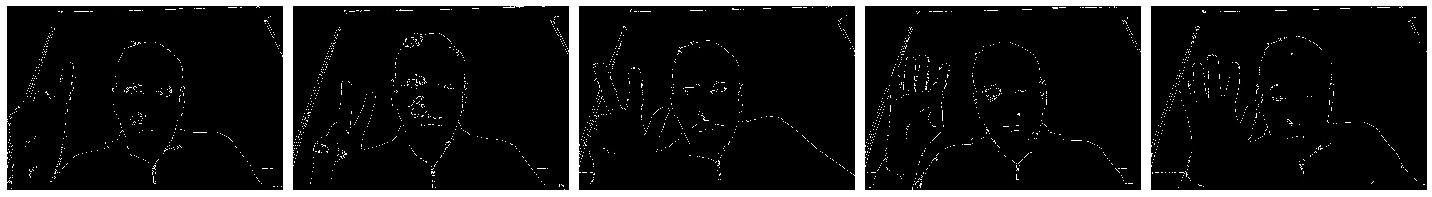

In [132]:
# Print the classes inside each jpeg sample
#font      = cv2.FONT_HERSHEY_SIMPLEX
#position  = (20,700)
#fontScale = 2
#fontColor = (255,255,255)
#lineType  = 5

#cv2.putText(samples[0], 'Class: 1', position, font, fontScale, fontColor, lineType)
#cv2.putText(samples[1], 'Class: 2', position, font, fontScale, fontColor, lineType)
#cv2.putText(samples[2], 'Class: 3', position, font, fontScale, fontColor, lineType)
#cv2.putText(samples[3], 'Class: 4', position, font, fontScale, fontColor, lineType)
#cv2.putText(samples[4], 'Class: 5', position, font, fontScale, fontColor, lineType)

plotImages(samples)

In [133]:
# parameters
train_dir = './data_edges/train'
test_dir = './data_edges/test'
batch_size = 16
epochs = 10
# will rescale all jpeg images to 255x255 for having a reasonable time for the training
IMG_HEIGHT = 255
IMG_WIDTH = 255

image_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

In [134]:
image_gen = ImageDataGenerator(rotation_range=10, # randomly rotate the image with <=10 degrees
                               #width_shift_range=0.10, # Shift the pic width by a max of 10%
                               #height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Normalize the image
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [135]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 16073 images belonging to 5 classes.


In [136]:
test_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=test_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                             )

Found 6880 images belonging to 5 classes.


In [137]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [138]:
# This function will plot images in the form of a grid with 1 row and 5 columns 
# where images are placed in each column.
def plotImages(images_arr, labels_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    i=1
    for label in labels_arr:
        print("Image", i, " one-hot encoded class:", label)
        i+=1

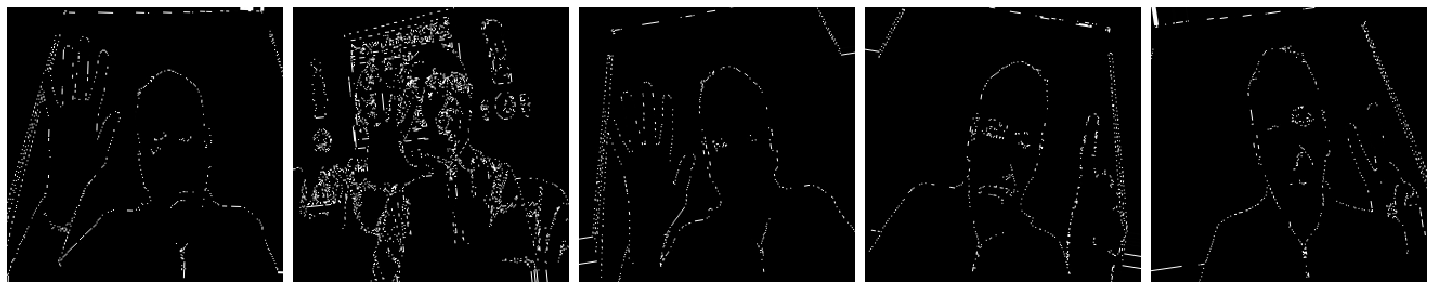

Image 1  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 2  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 3  one-hot encoded class: [0. 0. 0. 0. 1.]
Image 4  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 5  one-hot encoded class: [0. 1. 0. 0. 0.]


In [139]:
plotImages(sample_training_images[:5], sample_training_labels[:5])

In [140]:
sample_training_images[0].shape

(255, 255, 3)

The image is grayscale but for consistency I shall not change anything in the code

In [141]:
print(sample_training_images[0].min(), sample_training_images[0].max())

0.0 1.0


The situation is even better, there are only 2 possible values for a pixel: 0. and 1.

In [142]:
train_data_gen.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}

In [143]:
test_data_gen.class_indices

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}

# Model 4, two Conv2D layers with 16 and 32 filters, cv2.Canny

In [144]:
model4 = Sequential()

model4.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model4.add(MaxPooling2D(pool_size=(3, 3)))
model4.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(3, 3)))
#model4.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
#model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())

model4.add(Dense(255))
model4.add(Activation('relu'))

model4.add(Dense(5, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [145]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 255, 255, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 85, 85, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 255)               6397695   
_________________________________________________________________
activation_3 (Activation)    (None, 255)              

In [146]:
history = model4.fit_generator(train_data_gen,
                               epochs=epochs,
                               validation_data=test_data_gen,
                               callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1005 steps, validate for 430 steps
Epoch 1/10
1005/1005 [==============================] - 275s 274ms/step - loss: 0.6623 - accuracy: 0.7427 - val_loss: 0.4436 - val_accuracy: 0.8333
Epoch 2/10
1005/1005 [==============================] - 274s 272ms/step - loss: 0.2997 - accuracy: 0.8853 - val_loss: 0.3064 - val_accuracy: 0.8792
Epoch 3/10
1005/1005 [==============================] - 272s 271ms/step - loss: 0.2112 - accuracy: 0.9187 - val_loss: 0.2135 - val_accuracy: 0.9156
Epoch 4/10
1005/1005 [==============================] - 270s 269ms/step - loss: 0.1663 - accuracy: 0.9374 - val_loss: 0.1625 - val_accuracy: 0.9363
Epoch 5/10
1005/1005 [==============================] - 270s 268ms/step - loss: 0.1402 - accuracy: 0.9488 - val_loss: 0.1379 - val_accuracy: 0.9467
Epoch 6/10
1005/1005 [==============================] - 270s 269ms/step - loss: 0.1147 - accuracy: 0.9585 - val_loss: 0.1401 - val_accuracy: 0.9551
Epoch 7/10
1005/1

In [147]:
model4.save('model4-two-CNN-layers-Canny.h5')

In [148]:
losses_model4 = pd.DataFrame(model4.history.history)
losses_model4

loss  accuracy  val_loss  val_accuracy
0  0.662522  0.742736  0.443608      0.833285
1  0.299835  0.885273  0.306398      0.879215
2  0.211239  0.918746  0.213499      0.915552
3  0.166340  0.937411  0.162498      0.936337
4  0.140274  0.948796  0.137883      0.946657
5  0.114756  0.958502  0.140118      0.955087
6  0.106079  0.960990  0.101784      0.961628
7  0.095107  0.964101  0.138163      0.948692
8  0.078129  0.971754  0.091844      0.967297
9  0.080538  0.970821  0.119703      0.956977

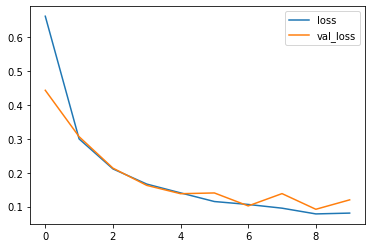

In [149]:
losses_model4[['loss','val_loss']].plot()

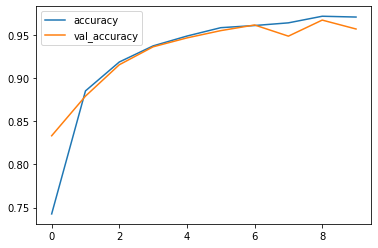

In [150]:
losses_model4[['accuracy','val_accuracy']].plot()

In [151]:
# Model 4 is very similar with model 3 for the train and test datasets.
# Starting from epoch 7, the model tends to overfit and early_stop fired.

In [153]:
model4.metrics_names

['loss', 'accuracy']

In [154]:
model4.evaluate_generator(test_data_gen)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']


[0.13038512407358718, 0.95377904]

In [155]:
predictions4 = model4.predict_classes(test1_images)

In [156]:
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)

In [157]:
for labels_vs_predictions in list(zip(labels, predictions4)):
    print(labels_vs_predictions, end=' ')

(0, 0) (2, 4) (0, 4) (4, 3) (2, 4) (0, 4) (4, 4) (2, 4) (2, 4) (0, 4) (0, 4) (4, 4) (4, 4) (3, 4) (4, 4) (0, 4) (3, 4) (1, 4) (2, 0) (2, 4) (1, 4) (4, 4) (3, 4) (2, 4) (3, 3) (3, 4) (4, 4) (0, 4) (3, 4) (3, 4) (4, 4) (4, 4) (1, 4) (2, 4) (2, 4) (2, 4) (1, 4) (4, 4) (3, 4) (0, 4) (1, 4) (4, 4) (1, 4) (2, 4) (0, 4) (0, 4) (2, 4) (0, 4) (1, 4) (1, 4) (0, 4) (1, 4) (3, 4) (2, 4) (0, 4) (1, 4) (0, 1) (4, 4) (0, 4) (4, 4) (4, 4) (4, 4) (3, 4) (3, 4) (2, 4) (3, 4) (3, 4) (0, 4) (0, 4) (1, 4) (3, 4) (0, 2) (2, 4) (3, 4) (1, 4) (3, 4) (1, 4) (0, 4) (4, 4) (2, 4) (1, 4) (2, 4) (2, 4) (2, 4) (2, 1) (3, 4) (1, 4) (3, 4) (1, 4) (3, 4) (0, 4) (2, 4) (1, 4) (4, 4) (1, 4) (4, 4) (1, 4) (0, 4) (4, 4) (0, 4) (2, 4) (2, 4) (4, 4) (0, 4) (2, 4) (1, 4) (4, 4) (4, 4) (1, 4) (3, 4) (3, 4) (4, 4) (3, 4) (0, 4) (1, 4) (3, 4) (4, 4) (3, 4) (0, 4) (0, 4) (2, 4) (2, 4) (0, 4) (4, 4) (0, 1) (1, 1) (2, 4) (2, 4) (1, 4) (2, 4) (3, 4) (4, 4) (4, 4) (0, 4) (2, 4) (4, 4) (0, 4) (1, 4) (0, 4) (1, 4) (0, 4) (4, 4) (1, 4)

In [159]:
print(classification_report(labels, predictions4))

              precision    recall  f1-score   support

           0       0.50      0.03      0.05        40
           1       0.20      0.03      0.04        40
           2       0.00      0.00      0.00        40
           3       0.50      0.05      0.09        40
           4       0.20      0.95      0.33        40

    accuracy                           0.21       200
   macro avg       0.28      0.21      0.10       200
weighted avg       0.28      0.21      0.10       200



In [160]:
confusion_matrix(labels, predictions4)

array([[ 1,  2,  1,  1, 35],
       [ 0,  1,  0,  0, 39],
       [ 1,  1,  0,  0, 38],
       [ 0,  0,  0,  2, 38],
       [ 0,  1,  0,  1, 38]])

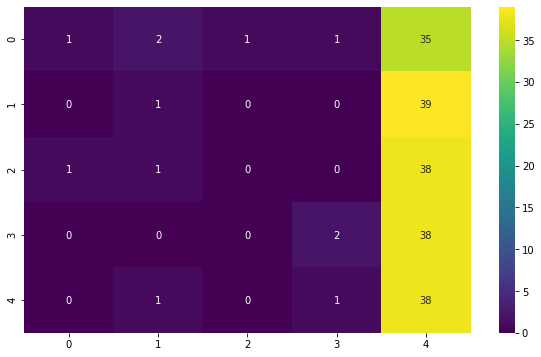

In [161]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions4), cmap='viridis', annot=True)

In [171]:
np.sum(confusion_matrix(labels, predictions4), axis=0)

array([  2,   5,   1,   4, 188])

In [174]:
# The bias is now extreme for class 4

# Model 5 - add one more convolutional layer, use edge images

In [175]:
model5 = Sequential()

model5.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=image_shape, activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())

model5.add(Dense(128))
model5.add(Activation('relu'))

model5.add(Dense(5, activation='softmax'))

model5.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# loss='sparse_categorical_crossentropy'
# optimizer='adam'

In [176]:
#model = Sequential()
#model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1))) 
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu')) 
#model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D((2, 2)))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dense(10, activation='softmax'))# Configures the model for training
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

In [177]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 255, 255, 32)      2432      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 127, 127, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 63, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 61504)            

In [178]:
history = model5.fit_generator(train_data_gen,
                               epochs=epochs,
                               validation_data=test_data_gen,
                               callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1005 steps, validate for 430 steps
Epoch 1/10
1005/1005 [==============================] - 291s 289ms/step - loss: 0.6547 - accuracy: 0.7477 - val_loss: 0.3683 - val_accuracy: 0.8612
Epoch 2/10
1005/1005 [==============================] - 298s 296ms/step - loss: 0.2951 - accuracy: 0.8882 - val_loss: 0.2786 - val_accuracy: 0.8906
Epoch 3/10
1005/1005 [==============================] - 290s 289ms/step - loss: 0.2178 - accuracy: 0.9179 - val_loss: 0.2011 - val_accuracy: 0.9251
Epoch 4/10
1005/1005 [==============================] - 291s 289ms/step - loss: 0.1697 - accuracy: 0.9387 - val_loss: 0.1427 - val_accuracy: 0.9465
Epoch 5/10
1005/1005 [==============================] - 281s 279ms/step - loss: 0.1369 - accuracy: 0.9491 - val_loss: 0.1192 - val_accuracy: 0.9533
Epoch 6/10
1005/1005 [==============================] - 278s 277ms/step - loss: 0.1150 - accuracy: 0.9589 - val_loss: 0.1482 - val_accuracy: 0.9467
Epoch 7/10
1005/1

In [179]:
model5.save('model5-three-CNN-layers.h5')

In [180]:
losses_model5 = pd.DataFrame(model5.history.history)
losses_model5

loss  accuracy  val_loss  val_accuracy
0  0.654809  0.747714  0.368291      0.861192
1  0.295207  0.888198  0.278576      0.890552
2  0.217876  0.917937  0.201063      0.925145
3  0.169753  0.938717  0.142691      0.946512
4  0.136940  0.949107  0.119171      0.953343
5  0.115061  0.958937  0.148211      0.946657
6  0.106844  0.960617  0.097418      0.964826
7  0.094968  0.966714  0.104024      0.965988
8  0.086179  0.970572  0.156613      0.953343

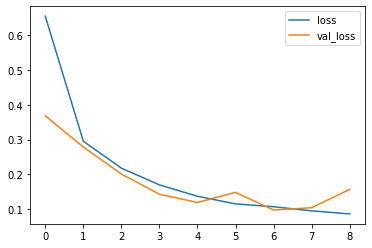

In [181]:
losses_model5[['loss','val_loss']].plot()

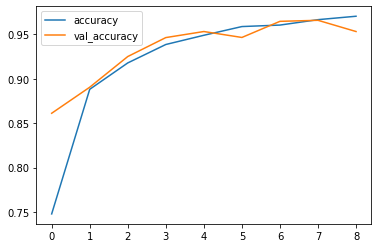

In [182]:
losses_model5[['accuracy','val_accuracy']].plot()

In [183]:
model5.metrics_names

['loss', 'accuracy']

In [184]:
model5.evaluate_generator(test_data_gen)

  ...
    to  
  ['...']


[0.1579452719183046, 0.9536337]

In [185]:
predictions5 = model5.predict_classes(test1_images)

In [186]:
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)

In [187]:
for labels_vs_predictions in list(zip(labels, predictions5)):
    print(labels_vs_predictions, end=' ')

(0, 2) (2, 4) (0, 4) (4, 1) (2, 4) (0, 4) (4, 4) (2, 4) (2, 4) (0, 4) (0, 2) (4, 4) (4, 4) (3, 4) (4, 4) (0, 4) (3, 1) (1, 4) (2, 1) (2, 4) (1, 4) (4, 1) (3, 4) (2, 4) (3, 3) (3, 4) (4, 4) (0, 4) (3, 4) (3, 1) (4, 4) (4, 4) (1, 4) (2, 1) (2, 4) (2, 4) (1, 4) (4, 4) (3, 4) (0, 4) (1, 4) (4, 4) (1, 4) (2, 4) (0, 4) (0, 4) (2, 4) (0, 4) (1, 4) (1, 4) (0, 4) (1, 4) (3, 4) (2, 4) (0, 4) (1, 1) (0, 1) (4, 4) (0, 4) (4, 4) (4, 1) (4, 4) (3, 4) (3, 4) (2, 4) (3, 4) (3, 4) (0, 4) (0, 4) (1, 4) (3, 1) (0, 1) (2, 4) (3, 4) (1, 4) (3, 4) (1, 4) (0, 4) (4, 4) (2, 4) (1, 4) (2, 4) (2, 2) (2, 4) (2, 1) (3, 4) (1, 4) (3, 4) (1, 4) (3, 4) (0, 4) (2, 1) (1, 4) (4, 4) (1, 4) (4, 4) (1, 2) (0, 4) (4, 4) (0, 4) (2, 1) (2, 1) (4, 4) (0, 4) (2, 1) (1, 4) (4, 4) (4, 4) (1, 4) (3, 4) (3, 4) (4, 4) (3, 2) (0, 1) (1, 4) (3, 4) (4, 4) (3, 4) (0, 1) (0, 4) (2, 4) (2, 3) (0, 4) (4, 4) (0, 4) (1, 1) (2, 4) (2, 4) (1, 4) (2, 4) (3, 4) (4, 4) (4, 4) (0, 4) (2, 4) (4, 4) (0, 4) (1, 4) (0, 4) (1, 4) (0, 4) (4, 1) (1, 4)

In [188]:
print(classification_report(labels, predictions5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.14      0.10      0.12        40
           2       0.17      0.03      0.04        40
           3       0.50      0.03      0.05        40
           4       0.21      0.85      0.34        40

    accuracy                           0.20       200
   macro avg       0.20      0.20      0.11       200
weighted avg       0.20      0.20      0.11       200



In [189]:
confusion_matrix(labels, predictions5)

array([[ 0,  6,  2,  0, 32],
       [ 0,  4,  1,  0, 35],
       [ 0,  7,  1,  1, 31],
       [ 1,  6,  2,  1, 30],
       [ 0,  6,  0,  0, 34]])

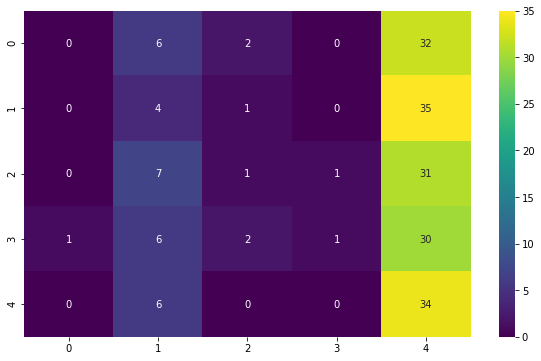

In [190]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions5), cmap='viridis', annot=True)

In [191]:
np.sum(confusion_matrix(labels, predictions5), axis=0)

array([  1,  29,   6,   2, 162])

# Model 6 - model 5 on original data, optimizer = 'adam'

In [290]:
# parameters
train_dir = './data/train'
test_dir = './data/test'
batch_size = 16
epochs = 10
# will rescale all jpeg images to 255x255 for having a reasonable time for the training
IMG_HEIGHT = 255
IMG_WIDTH = 255

image_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

In [291]:
image_gen = ImageDataGenerator(rotation_range=10, # randomly rotate the image with <=10 degrees
                               #width_shift_range=0.10, # Shift the pic width by a max of 10%
                               #height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Normalize the image
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [292]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 150 images belonging to 5 classes.


In [293]:
test_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=test_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                             )

Found 6880 images belonging to 5 classes.


In [202]:
model6 = Sequential()

model6.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=image_shape, activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())

model6.add(Dense(128))
model6.add(Activation('relu'))

model6.add(Dense(5, activation='softmax'))

model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [203]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 255, 255, 32)      2432      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 127, 127, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 63, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 61504)            

In [204]:
history = model6.fit_generator(train_data_gen,
                               epochs=epochs,
                               validation_data=test_data_gen,
                               callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1005 steps, validate for 430 steps
Epoch 1/10
1005/1005 [==============================] - 409s 407ms/step - loss: 0.8743 - accuracy: 0.6545 - val_loss: 0.4067 - val_accuracy: 0.8453
Epoch 2/10
1005/1005 [==============================] - 398s 396ms/step - loss: 0.2955 - accuracy: 0.8910 - val_loss: 0.2178 - val_accuracy: 0.9225
Epoch 3/10
1005/1005 [==============================] - 387s 385ms/step - loss: 0.1501 - accuracy: 0.9462 - val_loss: 0.0946 - val_accuracy: 0.9669
Epoch 4/10
1005/1005 [==============================] - 384s 382ms/step - loss: 0.0881 - accuracy: 0.9701 - val_loss: 0.0611 - val_accuracy: 0.9779
Epoch 5/10
1005/1005 [==============================] - 384s 382ms/step - loss: 0.0651 - accuracy: 0.9778 - val_loss: 0.0705 - val_accuracy: 0.9760
Epoch 6/10
1005/1005 [==============================] - 383s 381ms/step - loss: 0.0524 - accuracy: 0.9820 - val_loss: 0.0390 - val_accuracy: 0.9860
Epoch 7/10
1005/1

In [205]:
model6.save('model6-three-CNN-layers.h5')
losses_model6 = pd.DataFrame(model6.history.history)
losses_model6

loss  accuracy  val_loss  val_accuracy
0  0.874199  0.654514  0.406691      0.845349
1  0.295302  0.890997  0.217829      0.922529
2  0.149836  0.946245  0.094577      0.966860
3  0.087841  0.970074  0.061093      0.977907
4  0.065142  0.977789  0.070517      0.976017
5  0.052280  0.981957  0.038969      0.986046
6  0.035868  0.987806  0.047414      0.984738
7  0.039745  0.987308  0.043392      0.986192

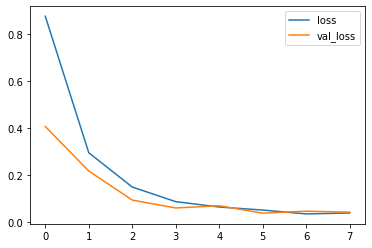

In [206]:
losses_model6[['loss','val_loss']].plot()

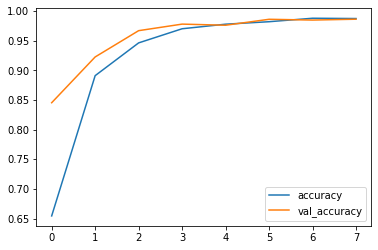

In [207]:
losses_model6[['accuracy','val_accuracy']].plot()

In [208]:
model6.metrics_names

['loss', 'accuracy']

In [209]:
test_loss, test_acc = model6.evaluate_generator(test_data_gen)
print('Test accuracy: {:2.2f}%'.format(test_acc*100))

  ...
    to  
  ['...']


[0.041323107705559164, 0.98735464]

In [210]:
predictions6 = model6.predict_classes(test1_images)
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)
for labels_vs_predictions in list(zip(labels, predictions6)):
    print(labels_vs_predictions, end=' ')

(0, 1) (2, 4) (0, 3) (4, 4) (2, 1) (0, 3) (4, 0) (2, 3) (2, 4) (0, 3) (0, 4) (4, 3) (4, 3) (3, 4) (4, 4) (0, 1) (3, 1) (1, 4) (2, 4) (2, 3) (1, 3) (4, 4) (3, 2) (2, 3) (3, 4) (3, 3) (4, 3) (0, 3) (3, 3) (3, 3) (4, 3) (4, 2) (1, 0) (2, 1) (2, 1) (2, 3) (1, 1) (4, 4) (3, 1) (0, 3) (1, 4) (4, 4) (1, 3) (2, 3) (0, 4) (0, 1) (2, 3) (0, 1) (1, 1) (1, 3) (0, 3) (1, 4) (3, 4) (2, 2) (0, 1) (1, 4) (0, 4) (4, 4) (0, 4) (4, 3) (4, 1) (4, 4) (3, 0) (3, 3) (2, 3) (3, 1) (3, 4) (0, 3) (0, 3) (1, 4) (3, 4) (0, 3) (2, 3) (3, 3) (1, 4) (3, 4) (1, 3) (0, 2) (4, 1) (2, 1) (1, 3) (2, 3) (2, 2) (2, 1) (2, 3) (3, 4) (1, 4) (3, 3) (1, 3) (3, 1) (0, 1) (2, 4) (1, 3) (4, 3) (1, 1) (4, 4) (1, 4) (0, 0) (4, 4) (0, 4) (2, 3) (2, 1) (4, 3) (0, 3) (2, 4) (1, 3) (4, 2) (4, 0) (1, 3) (3, 3) (3, 3) (4, 4) (3, 1) (0, 3) (1, 4) (3, 3) (4, 0) (3, 3) (0, 3) (0, 4) (2, 3) (2, 3) (0, 1) (4, 3) (0, 1) (1, 3) (2, 4) (2, 3) (1, 4) (2, 1) (3, 4) (4, 2) (4, 4) (0, 4) (2, 4) (4, 1) (0, 3) (1, 2) (0, 4) (1, 4) (0, 2) (4, 4) (1, 3)

In [211]:
print(classification_report(labels, predictions6))

              precision    recall  f1-score   support

           0       0.12      0.03      0.04        40
           1       0.21      0.20      0.21        40
           2       0.17      0.05      0.08        40
           3       0.20      0.40      0.27        40
           4       0.22      0.35      0.27        40

    accuracy                           0.20       200
   macro avg       0.19      0.20      0.17       200
weighted avg       0.19      0.20      0.17       200



In [212]:
confusion_matrix(labels, predictions6)

array([[ 1,  9,  3, 15, 12],
       [ 2,  8,  2, 16, 12],
       [ 0,  8,  2, 19, 11],
       [ 2,  7,  1, 16, 14],
       [ 3,  6,  4, 13, 14]])

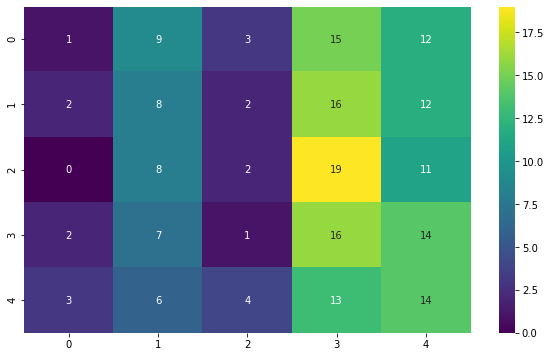

In [213]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions6), cmap='viridis', annot=True)

In [214]:
np.sum(confusion_matrix(labels, predictions6), axis=0)

array([ 8, 38, 12, 79, 63])

In [ ]:
# This is a better model than model 5 even if accuracy is still 20%
# because now the bias is on classes 3 and 4, not just on class 4 as before
# For classes 3 and 4, the highest values are on the diagonal and this is encouraging

In [259]:
model7 = Sequential()

model7.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=image_shape, activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))
model7.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Flatten())

model7.add(Dense(128))
model7.add(Activation('relu'))

model7.add(Dense(5, activation='softmax'))

model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [260]:
model7.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 255, 255, 32)      2432      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 127, 127, 64)      32832     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 63, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 61504)           

In [261]:
history = model7.fit_generator(train_data_gen,
                               epochs=epochs,
                               validation_data=test_data_gen,
                               callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1014 steps, validate for 430 steps
Epoch 1/10
1014/1014 [==============================] - 390s 385ms/step - loss: 0.8298 - accuracy: 0.6666 - val_loss: 0.3647 - val_accuracy: 0.8667
Epoch 2/10
1014/1014 [==============================] - 386s 381ms/step - loss: 0.2880 - accuracy: 0.8965 - val_loss: 0.1546 - val_accuracy: 0.9474
Epoch 3/10
1014/1014 [==============================] - 387s 381ms/step - loss: 0.1386 - accuracy: 0.9536 - val_loss: 0.0727 - val_accuracy: 0.9750
Epoch 4/10
1014/1014 [==============================] - 387s 382ms/step - loss: 0.0948 - accuracy: 0.9707 - val_loss: 0.0669 - val_accuracy: 0.9808
Epoch 5/10
1014/1014 [==============================] - 386s 381ms/step - loss: 0.0662 - accuracy: 0.9790 - val_loss: 0.0384 - val_accuracy: 0.9882
Epoch 6/10
1014/1014 [==============================] - 386s 381ms/step - loss: 0.0531 - accuracy: 0.9835 - val_loss: 0.0202 - val_accuracy: 0.9937
Epoch 7/10
1014/1

In [262]:
model7.save('model7-three-CNN-layers.h5')
losses_model7 = pd.DataFrame(model7.history.history)
losses_model7

loss  accuracy  val_loss  val_accuracy
0  0.829805  0.666646  0.364718      0.866715
1  0.287973  0.896505  0.154596      0.947384
2  0.138564  0.953584  0.072693      0.975000
3  0.094769  0.970721  0.066916      0.980814
4  0.066226  0.978980  0.038425      0.988227
5  0.053073  0.983480  0.020180      0.993750
6  0.044289  0.986501  0.030577      0.990988
7  0.040062  0.986994  0.032797      0.990262

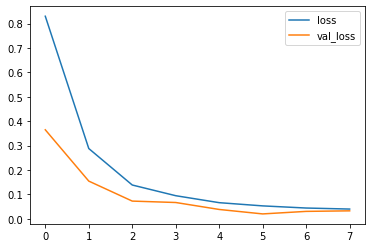

In [263]:
losses_model7[['loss','val_loss']].plot()

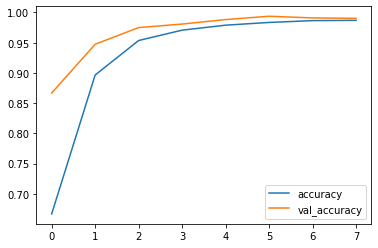

In [264]:
losses_model7[['accuracy','val_accuracy']].plot()

In [265]:
test_loss, test_acc = model7.evaluate_generator(test_data_gen)
print('Test accuracy: {:2.2f}%'.format(test_acc*100))

  ...
    to  
  ['...']
Test accuracy: 99.07%


In [266]:
predictions7 = model7.predict_classes(test1_images)
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)
for labels_vs_predictions in list(zip(labels, predictions7)):
    print(labels_vs_predictions, end=' ')

(0, 2) (2, 1) (0, 1) (4, 4) (2, 1) (0, 0) (4, 4) (2, 3) (2, 3) (0, 3) (0, 0) (4, 4) (4, 3) (3, 4) (4, 0) (0, 3) (3, 1) (1, 1) (2, 2) (2, 2) (1, 3) (4, 4) (3, 0) (2, 3) (3, 3) (3, 3) (4, 4) (0, 3) (3, 4) (3, 3) (4, 2) (4, 2) (1, 1) (2, 1) (2, 2) (2, 1) (1, 1) (4, 4) (3, 1) (0, 3) (1, 1) (4, 4) (1, 1) (2, 2) (0, 0) (0, 0) (2, 3) (0, 0) (1, 4) (1, 1) (0, 0) (1, 1) (3, 3) (2, 2) (0, 1) (1, 1) (0, 4) (4, 4) (0, 0) (4, 1) (4, 4) (4, 1) (3, 3) (3, 0) (2, 1) (3, 2) (3, 4) (0, 3) (0, 4) (1, 1) (3, 4) (0, 1) (2, 2) (3, 3) (1, 1) (3, 3) (1, 3) (0, 1) (4, 4) (2, 2) (1, 1) (2, 2) (2, 2) (2, 2) (2, 3) (3, 3) (1, 2) (3, 2) (1, 3) (3, 3) (0, 1) (2, 1) (1, 1) (4, 4) (1, 1) (4, 4) (1, 1) (0, 0) (4, 3) (0, 0) (2, 3) (2, 3) (4, 0) (0, 2) (2, 2) (1, 2) (4, 2) (4, 3) (1, 3) (3, 1) (3, 1) (4, 1) (3, 3) (0, 2) (1, 3) (3, 3) (4, 2) (3, 4) (0, 3) (0, 3) (2, 3) (2, 2) (0, 0) (4, 3) (0, 0) (1, 1) (2, 2) (2, 1) (1, 0) (2, 2) (3, 1) (4, 4) (4, 1) (0, 1) (2, 1) (4, 3) (0, 0) (1, 3) (0, 2) (1, 1) (0, 0) (4, 1) (1, 3)

In [267]:
print(classification_report(labels, predictions7))

              precision    recall  f1-score   support

           0       0.71      0.42      0.53        40
           1       0.42      0.55      0.48        40
           2       0.56      0.55      0.56        40
           3       0.34      0.45      0.39        40
           4       0.62      0.50      0.56        40

    accuracy                           0.49       200
   macro avg       0.53      0.49      0.50       200
weighted avg       0.53      0.49      0.50       200



In [268]:
confusion_matrix(labels, predictions7)

array([[17,  7,  4,  9,  3],
       [ 2, 22,  4, 11,  1],
       [ 0,  9, 22,  8,  1],
       [ 2,  8,  5, 18,  7],
       [ 3,  6,  4,  7, 20]])

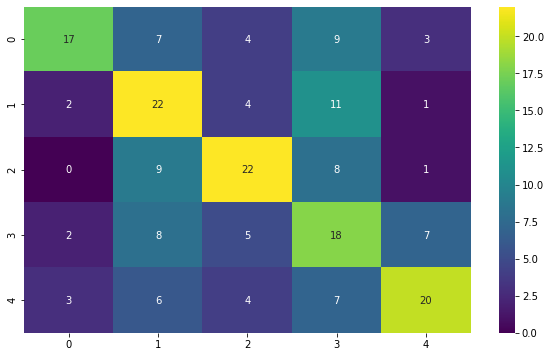

In [269]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions7), cmap='viridis', annot=True)

In [270]:
np.sum(confusion_matrix(labels, predictions7), axis=0)

array([24, 52, 39, 53, 32])

In [271]:
# This result is much better but there were 2 changes from the previous model
# including adding 30 new images on each /train class
# I will test the mnext model without these new 30 images for each /train class

In [276]:
model8 = Sequential()

model8.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=image_shape, activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Flatten())

model8.add(Dense(128))
model8.add(Activation('relu'))

model8.add(Dense(5, activation='softmax'))

model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [277]:
model8.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 255, 255, 32)      2432      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 127, 127, 64)      32832     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 63, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 61504)           

In [278]:
history = model8.fit_generator(train_data_gen,
                               epochs=epochs,
                               validation_data=test_data_gen,
                               callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1005 steps, validate for 430 steps
Epoch 1/10
1005/1005 [==============================] - 387s 385ms/step - loss: 0.7326 - accuracy: 0.7104 - val_loss: 0.3830 - val_accuracy: 0.8599
Epoch 2/10
1005/1005 [==============================] - 384s 382ms/step - loss: 0.2192 - accuracy: 0.9208 - val_loss: 0.1375 - val_accuracy: 0.9512
Epoch 3/10
1005/1005 [==============================] - 385s 384ms/step - loss: 0.1017 - accuracy: 0.9650 - val_loss: 0.0746 - val_accuracy: 0.9749
Epoch 4/10
1005/1005 [==============================] - 386s 385ms/step - loss: 0.0850 - accuracy: 0.9711 - val_loss: 0.0521 - val_accuracy: 0.9812
Epoch 5/10
1005/1005 [==============================] - 386s 384ms/step - loss: 0.0463 - accuracy: 0.9845 - val_loss: 0.0445 - val_accuracy: 0.9842
Epoch 6/10
1005/1005 [==============================] - 387s 385ms/step - loss: 0.0401 - accuracy: 0.9864 - val_loss: 0.0253 - val_accuracy: 0.9913
Epoch 7/10
1005/1

In [279]:
model8.save('model8-three-CNN-layers-original-train-images.h5')
losses_model8 = pd.DataFrame(model8.history.history)
losses_model8

loss  accuracy  val_loss  val_accuracy
0  0.732855  0.710446  0.382988      0.859884
1  0.219233  0.920799  0.137497      0.951163
2  0.101744  0.964972  0.074586      0.974855
3  0.085063  0.971132  0.052079      0.981250
4  0.046346  0.984508  0.044484      0.984157
5  0.040100  0.986375  0.025253      0.991279
6  0.039318  0.987557  0.040161      0.988372
7  0.032314  0.990543  0.010570      0.996802
8  0.030616  0.990294  0.015480      0.995640
9  0.030096  0.990232  0.016099      0.994622

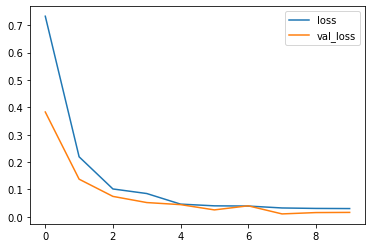

In [280]:
losses_model8[['loss','val_loss']].plot()

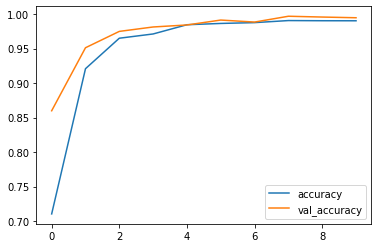

In [281]:
losses_model8[['accuracy','val_accuracy']].plot()

In [282]:
test_loss, test_acc = model8.evaluate_generator(test_data_gen)
print('Test accuracy: {:2.2f}%'.format(test_acc*100))

  ...
    to  
  ['...']
Test accuracy: 99.22%


In [283]:
predictions8 = model8.predict_classes(test1_images)
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)
for labels_vs_predictions in list(zip(labels, predictions8)):
    print(labels_vs_predictions, end=' ')

(0, 2) (2, 1) (0, 3) (4, 4) (2, 4) (0, 4) (4, 3) (2, 3) (2, 3) (0, 4) (0, 2) (4, 3) (4, 3) (3, 4) (4, 1) (0, 3) (3, 4) (1, 1) (2, 4) (2, 4) (1, 4) (4, 1) (3, 0) (2, 4) (3, 4) (3, 3) (4, 4) (0, 3) (3, 4) (3, 3) (4, 2) (4, 4) (1, 0) (2, 1) (2, 4) (2, 4) (1, 2) (4, 2) (3, 1) (0, 1) (1, 4) (4, 4) (1, 3) (2, 3) (0, 4) (0, 2) (2, 1) (0, 4) (1, 4) (1, 3) (0, 4) (1, 4) (3, 1) (2, 3) (0, 4) (1, 4) (0, 4) (4, 4) (0, 3) (4, 1) (4, 4) (4, 1) (3, 4) (3, 3) (2, 0) (3, 3) (3, 4) (0, 4) (0, 2) (1, 4) (3, 1) (0, 1) (2, 3) (3, 3) (1, 1) (3, 1) (1, 4) (0, 1) (4, 1) (2, 4) (1, 3) (2, 1) (2, 2) (2, 1) (2, 3) (3, 3) (1, 3) (3, 4) (1, 0) (3, 3) (0, 1) (2, 1) (1, 1) (4, 3) (1, 1) (4, 4) (1, 4) (0, 4) (4, 1) (0, 0) (2, 3) (2, 1) (4, 1) (0, 3) (2, 3) (1, 0) (4, 4) (4, 1) (1, 3) (3, 1) (3, 4) (4, 4) (3, 3) (0, 4) (1, 3) (3, 3) (4, 2) (3, 3) (0, 3) (0, 3) (2, 3) (2, 1) (0, 3) (4, 1) (0, 4) (1, 0) (2, 1) (2, 1) (1, 4) (2, 3) (3, 4) (4, 1) (4, 2) (0, 4) (2, 4) (4, 1) (0, 3) (1, 3) (0, 0) (1, 4) (0, 2) (4, 4) (1, 1)

In [284]:
print(classification_report(labels, predictions8))

              precision    recall  f1-score   support

           0       0.20      0.05      0.08        40
           1       0.19      0.28      0.23        40
           2       0.07      0.03      0.04        40
           3       0.23      0.30      0.26        40
           4       0.18      0.30      0.23        40

    accuracy                           0.19       200
   macro avg       0.17      0.19      0.17       200
weighted avg       0.17      0.19      0.17       200



In [285]:
confusion_matrix(labels, predictions8)

array([[ 2,  6,  7, 10, 15],
       [ 5, 11,  2, 10, 12],
       [ 1, 13,  1, 14, 11],
       [ 1, 11,  0, 12, 16],
       [ 1, 16,  4,  7, 12]])

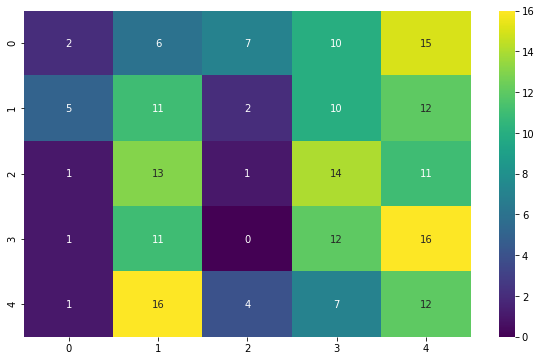

In [286]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions8), cmap='viridis', annot=True)

In [287]:
np.sum(confusion_matrix(labels, predictions8), axis=0)

array([10, 57, 14, 53, 66])

In [289]:
# This shows that without the new 150 images (30 images / class) the result
# is unacceptable, the accuracy is 19%
# Therefore high quality data is extremely important!
# However, with the new parameters the predictions are not as biased
# towards class 4 as they were in model 5

In [294]:
model9 = Sequential()

model9.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=image_shape, activation='relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))

model9.add(Flatten())

model9.add(Dense(128))
model9.add(Activation('relu'))

model9.add(Dense(5, activation='softmax'))

model9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [295]:
model9.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 255, 255, 32)      2432      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 127, 127, 64)      32832     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 63, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 61504)           

In [296]:
history = model9.fit_generator(train_data_gen,
                               epochs=epochs,
                               validation_data=test_data_gen,
                               callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 430 steps
Epoch 1/10
10/10 [==============================] - 115s 12s/step - loss: 2.4622 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.2196
Epoch 2/10
10/10 [==============================] - 114s 11s/step - loss: 1.6225 - accuracy: 0.1933 - val_loss: 1.6119 - val_accuracy: 0.2196
Epoch 3/10
10/10 [==============================] - 114s 11s/step - loss: 1.6095 - accuracy: 0.2000 - val_loss: 1.6130 - val_accuracy: 0.2035


In [297]:
model9.save('model9-three-CNN-layers-30-train-images.h5')
losses_model9 = pd.DataFrame(model9.history.history)
losses_model9

loss  accuracy  val_loss  val_accuracy
0  2.513596  0.200000  1.609391      0.219622
1  1.627261  0.193333  1.611920      0.219622
2  1.610800  0.200000  1.612952      0.203488

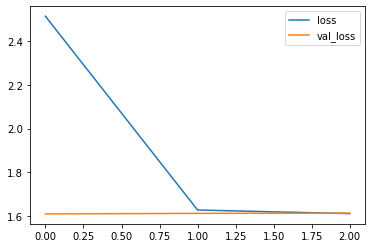

In [298]:
losses_model9[['loss','val_loss']].plot()

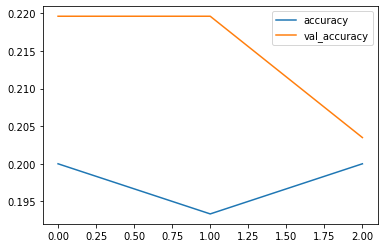

In [299]:
losses_model9[['accuracy','val_accuracy']].plot()

In [300]:
test_loss, test_acc = model9.evaluate_generator(test_data_gen)
print('Test accuracy: {:2.2f}%'.format(test_acc*100))

  ...
    to  
  ['...']
Test accuracy: 20.35%


In [301]:
predictions9 = model9.predict_classes(test1_images)
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)
for labels_vs_predictions in list(zip(labels, predictions9)):
    print(labels_vs_predictions, end=' ')

(0, 1) (2, 1) (0, 1) (4, 1) (2, 1) (0, 1) (4, 1) (2, 1) (2, 1) (0, 1) (0, 0) (4, 1) (4, 1) (3, 1) (4, 1) (0, 1) (3, 1) (1, 1) (2, 1) (2, 1) (1, 1) (4, 1) (3, 1) (2, 1) (3, 1) (3, 1) (4, 1) (0, 1) (3, 1) (3, 1) (4, 1) (4, 1) (1, 1) (2, 1) (2, 1) (2, 0) (1, 1) (4, 1) (3, 1) (0, 1) (1, 1) (4, 1) (1, 1) (2, 1) (0, 1) (0, 1) (2, 1) (0, 1) (1, 1) (1, 1) (0, 1) (1, 1) (3, 1) (2, 1) (0, 1) (1, 1) (0, 1) (4, 1) (0, 1) (4, 1) (4, 1) (4, 0) (3, 1) (3, 1) (2, 1) (3, 1) (3, 1) (0, 1) (0, 1) (1, 1) (3, 1) (0, 1) (2, 1) (3, 1) (1, 1) (3, 1) (1, 1) (0, 1) (4, 1) (2, 1) (1, 1) (2, 1) (2, 1) (2, 1) (2, 1) (3, 1) (1, 1) (3, 1) (1, 1) (3, 1) (0, 1) (2, 1) (1, 1) (4, 1) (1, 1) (4, 1) (1, 1) (0, 1) (4, 1) (0, 1) (2, 1) (2, 1) (4, 1) (0, 1) (2, 1) (1, 1) (4, 1) (4, 1) (1, 1) (3, 1) (3, 1) (4, 0) (3, 0) (0, 1) (1, 1) (3, 1) (4, 1) (3, 1) (0, 1) (0, 0) (2, 1) (2, 1) (0, 1) (4, 1) (0, 1) (1, 1) (2, 1) (2, 1) (1, 1) (2, 1) (3, 1) (4, 1) (4, 1) (0, 1) (2, 1) (4, 1) (0, 1) (1, 1) (0, 1) (1, 1) (0, 1) (4, 1) (1, 1)

In [302]:
print(classification_report(labels, predictions9))

              precision    recall  f1-score   support

           0       0.27      0.07      0.12        40
           1       0.21      0.97      0.34        40
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        40

    accuracy                           0.21       200
   macro avg       0.10      0.21      0.09       200
weighted avg       0.10      0.21      0.09       200



/home/ubuntu18/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [303]:
confusion_matrix(labels, predictions9)

array([[ 3, 37,  0,  0,  0],
       [ 1, 39,  0,  0,  0],
       [ 1, 39,  0,  0,  0],
       [ 2, 38,  0,  0,  0],
       [ 4, 36,  0,  0,  0]])

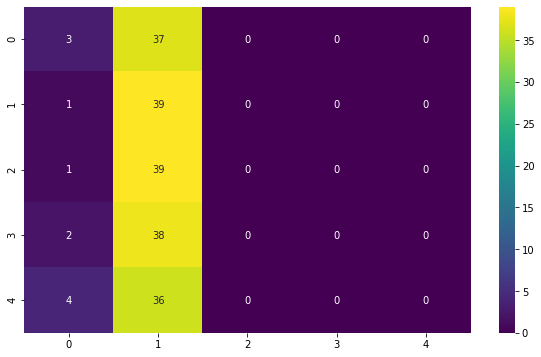

In [304]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions9), cmap='viridis', annot=True)

In [305]:
np.sum(confusion_matrix(labels, predictions9), axis=0)

array([ 11, 189,   0,   0,   0])

In [ ]:
# This time the bias towards class 1 is extreme.
# This is just an experiment, 30 images/class is obviously not enough.
# As a conclusion, the data must have both elements: thousands of images per class
# taken from the .mov files and enough variation taken from the 30 internet images per class
# Unfortunatelly, getting thousands of internet images is time consuming
# The performance is highly non-linear with data quality.
# A mere 1% of new images (30 images compared to 3000 original low quality images per class)
# resulted in a jump in accuracy from a random guess of 20% to 49%

# Next idea for model 10: use model 7 with cv2.Canny

In [306]:
# parameters
train_dir = './data_edges/train'
test_dir = './data_edges/test'
batch_size = 16
epochs = 10
# will rescale all jpeg images to 255x255 for having a reasonable time for the training
IMG_HEIGHT = 255
IMG_WIDTH = 255

image_shape = (IMG_HEIGHT, IMG_WIDTH, 3)

In [307]:
image_gen = ImageDataGenerator(rotation_range=10, # randomly rotate the image with <=10 degrees
                               #width_shift_range=0.10, # Shift the pic width by a max of 10%
                               #height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Normalize the image
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

In [308]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 16073 images belonging to 5 classes.


In [309]:
test_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=test_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH)
                                             )

Found 6880 images belonging to 5 classes.


# Model 10 uses cv2.Canny() for /train and /test but do not add the new 30 images per class

In [310]:
model10 = Sequential()

model10.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=image_shape, activation='relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))
model10.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))

model10.add(Flatten())

model10.add(Dense(128))
model10.add(Activation('relu'))

model10.add(Dense(5, activation='softmax'))

model10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [311]:
model10.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 255, 255, 32)      2432      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 127, 127, 64)      32832     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 63, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 61504)           

In [312]:
history = model10.fit_generator(train_data_gen,
                                epochs=epochs,
                                validation_data=test_data_gen,
                                callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1005 steps, validate for 430 steps
Epoch 1/10
1005/1005 [==============================] - 281s 280ms/step - loss: 0.6089 - accuracy: 0.7556 - val_loss: 0.3409 - val_accuracy: 0.8693
Epoch 2/10
1005/1005 [==============================] - 280s 278ms/step - loss: 0.2558 - accuracy: 0.9014 - val_loss: 0.2234 - val_accuracy: 0.9142
Epoch 3/10
1005/1005 [==============================] - 279s 278ms/step - loss: 0.1720 - accuracy: 0.9342 - val_loss: 0.1640 - val_accuracy: 0.9359
Epoch 4/10
1005/1005 [==============================] - 280s 279ms/step - loss: 0.1273 - accuracy: 0.9541 - val_loss: 0.1328 - val_accuracy: 0.9487
Epoch 5/10
1005/1005 [==============================] - 279s 278ms/step - loss: 0.1076 - accuracy: 0.9612 - val_loss: 0.1384 - val_accuracy: 0.9477
Epoch 6/10
1005/1005 [==============================] - 279s 277ms/step - loss: 0.0877 - accuracy: 0.9691 - val_loss: 0.1108 - val_accuracy: 0.9624
Epoch 7/10
1005/1

In [313]:
model10.save('model10-edge-original-test-images.h5')
losses_model10 = pd.DataFrame(model10.history.history)
losses_model10

loss  accuracy  val_loss  val_accuracy
0  0.608476  0.755615  0.340941      0.869331
1  0.255697  0.901387  0.223420      0.914244
2  0.172036  0.934175  0.164029      0.935901
3  0.127227  0.954085  0.132753      0.948692
4  0.107637  0.961177  0.138393      0.947674
5  0.087684  0.969079  0.110800      0.962355
6  0.078410  0.971692  0.084407      0.968169
7  0.067528  0.975362  0.121801      0.955814
8  0.059008  0.979282  0.083010      0.972093
9  0.057181  0.980900  0.067074      0.978198

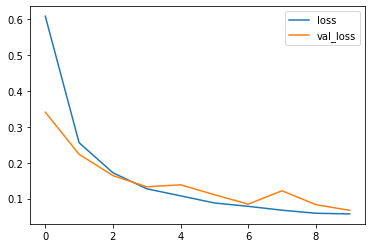

In [314]:
losses_model10[['loss','val_loss']].plot()

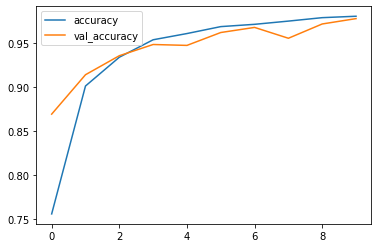

In [315]:
losses_model10[['accuracy','val_accuracy']].plot()

In [316]:
test_loss, test_acc = model10.evaluate_generator(test_data_gen)
print('Test accuracy: {:2.2f}%'.format(test_acc*100))

  ...
    to  
  ['...']
Test accuracy: 97.78%


In [317]:
predictions10 = model10.predict_classes(test1_images)
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)
for labels_vs_predictions in list(zip(labels, predictions10)):
    print(labels_vs_predictions, end=' ')

(0, 2) (2, 4) (0, 4) (4, 4) (2, 4) (0, 1) (4, 4) (2, 4) (2, 4) (0, 4) (0, 2) (4, 4) (4, 4) (3, 4) (4, 2) (0, 4) (3, 1) (1, 4) (2, 4) (2, 4) (1, 4) (4, 1) (3, 4) (2, 4) (3, 4) (3, 4) (4, 4) (0, 4) (3, 4) (3, 4) (4, 4) (4, 4) (1, 4) (2, 2) (2, 1) (2, 4) (1, 4) (4, 4) (3, 2) (0, 4) (1, 0) (4, 4) (1, 4) (2, 4) (0, 4) (0, 4) (2, 4) (0, 4) (1, 2) (1, 4) (0, 4) (1, 4) (3, 4) (2, 4) (0, 4) (1, 4) (0, 2) (4, 4) (0, 4) (4, 4) (4, 4) (4, 4) (3, 4) (3, 4) (2, 4) (3, 4) (3, 4) (0, 2) (0, 4) (1, 4) (3, 1) (0, 4) (2, 4) (3, 4) (1, 4) (3, 4) (1, 0) (0, 2) (4, 4) (2, 4) (1, 4) (2, 4) (2, 0) (2, 4) (2, 3) (3, 4) (1, 4) (3, 4) (1, 4) (3, 4) (0, 1) (2, 1) (1, 4) (4, 4) (1, 4) (4, 4) (1, 2) (0, 4) (4, 4) (0, 4) (2, 2) (2, 4) (4, 4) (0, 4) (2, 2) (1, 1) (4, 0) (4, 4) (1, 4) (3, 4) (3, 4) (4, 4) (3, 2) (0, 2) (1, 4) (3, 4) (4, 4) (3, 4) (0, 4) (0, 1) (2, 4) (2, 1) (0, 4) (4, 4) (0, 4) (1, 1) (2, 4) (2, 4) (1, 4) (2, 4) (3, 3) (4, 1) (4, 4) (0, 4) (2, 4) (4, 4) (0, 4) (1, 4) (0, 4) (1, 1) (0, 4) (4, 4) (1, 4)

In [318]:
print(classification_report(labels, predictions10))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.24      0.10      0.14        40
           2       0.16      0.07      0.10        40
           3       0.20      0.03      0.04        40
           4       0.22      0.82      0.35        40

    accuracy                           0.20       200
   macro avg       0.16      0.20      0.13       200
weighted avg       0.16      0.20      0.13       200



In [319]:
confusion_matrix(labels, predictions10)

array([[ 0,  3,  8,  1, 28],
       [ 3,  4,  2,  1, 30],
       [ 2,  3,  3,  1, 31],
       [ 1,  4,  5,  1, 29],
       [ 2,  3,  1,  1, 33]])

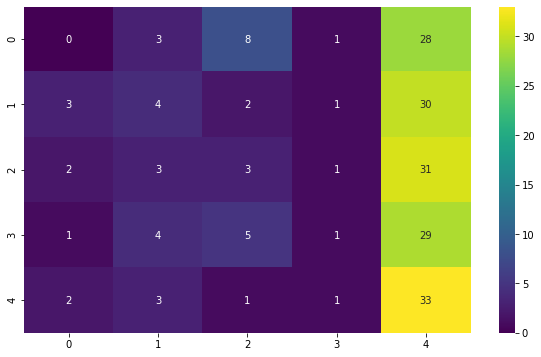

In [320]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions10), cmap='viridis', annot=True)

In [322]:
np.sum(confusion_matrix(labels, predictions10), axis=0)

array([  8,  17,  19,   5, 151])

# Model 11 uses cv2.Canny() and the new 30 images per class

In [335]:
model11 = Sequential()

model11.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', input_shape=image_shape, activation='relu'))
model11.add(MaxPooling2D(pool_size=(2, 2)))
model11.add(Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'))
model11.add(MaxPooling2D(pool_size=(2, 2)))
model11.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model11.add(MaxPooling2D(pool_size=(2, 2)))

model11.add(Flatten())

model11.add(Dense(128))
model11.add(Activation('relu'))

model11.add(Dense(5, activation='softmax'))

model11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [336]:
model11.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 255, 255, 32)      2432      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 127, 127, 64)      32832     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 63, 63, 64)        36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 61504)           

In [337]:
history = model11.fit_generator(train_data_gen,
                                epochs=epochs,
                                validation_data=test_data_gen,
                                callbacks=[early_stop])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1005 steps, validate for 430 steps
Epoch 1/10
1005/1005 [==============================] - 278s 276ms/step - loss: 0.5952 - accuracy: 0.7650 - val_loss: 0.3465 - val_accuracy: 0.8663
Epoch 2/10
1005/1005 [==============================] - 276s 275ms/step - loss: 0.2526 - accuracy: 0.9032 - val_loss: 0.2429 - val_accuracy: 0.9089
Epoch 3/10
1005/1005 [==============================] - 275s 273ms/step - loss: 0.1742 - accuracy: 0.9318 - val_loss: 0.1546 - val_accuracy: 0.9404
Epoch 4/10
1005/1005 [==============================] - 275s 274ms/step - loss: 0.1372 - accuracy: 0.9494 - val_loss: 0.1234 - val_accuracy: 0.9513
Epoch 5/10
1005/1005 [==============================] - 275s 274ms/step - loss: 0.1070 - accuracy: 0.9599 - val_loss: 0.1194 - val_accuracy: 0.9549
Epoch 6/10
1005/1005 [==============================] - 275s 273ms/step - loss: 0.0937 - accuracy: 0.9664 - val_loss: 0.1099 - val_accuracy: 0.9592
Epoch 7/10
1005/1

In [338]:
model11.save('model11-edge-new-train-images.h5')
losses_model11 = pd.DataFrame(model11.history.history)
losses_model11

loss  accuracy  val_loss  val_accuracy
0  0.594874  0.765010  0.346522      0.866279
1  0.252365  0.903192  0.242897      0.908866
2  0.174179  0.931811  0.154606      0.940407
3  0.137195  0.949356  0.123447      0.951308
4  0.106876  0.959933  0.119412      0.954942
5  0.093730  0.966403  0.109924      0.959157
6  0.076649  0.971567  0.104380      0.960901
7  0.071576  0.973745  0.097182      0.965407
8  0.067061  0.975673  0.072738      0.974709
9  0.057803  0.979033  0.074190      0.973837

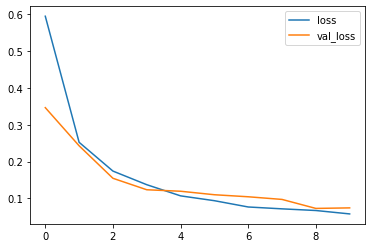

In [339]:
losses_model11[['loss','val_loss']].plot()

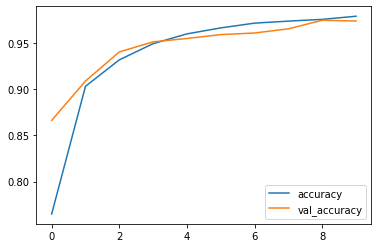

In [340]:
losses_model11[['accuracy','val_accuracy']].plot()

In [341]:
test_loss, test_acc = model11.evaluate_generator(test_data_gen)
print('Test accuracy: {:2.2f}%'.format(test_acc*100))

  ...
    to  
  ['...']
Test accuracy: 97.18%


In [342]:
predictions11 = model11.predict_classes(test1_images)
labels = []
for result in test1_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)
#for labels_vs_predictions in list(zip(labels, predictions10)):
#    print(labels_vs_predictions, end=' ')

In [343]:
print(classification_report(labels, predictions11))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.25      0.03      0.05        40
           2       0.21      0.07      0.11        40
           3       0.20      0.10      0.13        40
           4       0.21      0.82      0.34        40

    accuracy                           0.20       200
   macro avg       0.18      0.20      0.13       200
weighted avg       0.18      0.20      0.13       200



In [344]:
confusion_matrix(labels, predictions11)

array([[ 0,  1,  5,  2, 32],
       [ 2,  1,  2,  6, 29],
       [ 1,  0,  3,  3, 33],
       [ 2,  1,  4,  4, 29],
       [ 1,  1,  0,  5, 33]])

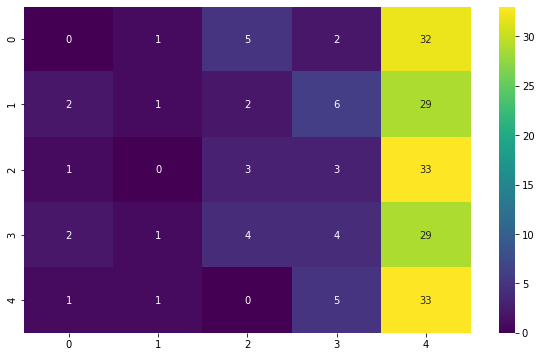

In [345]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(labels, predictions11), cmap='viridis', annot=True)

In [346]:
np.sum(confusion_matrix(labels, predictions11), axis=0)

array([  6,   4,  14,  20, 156])

In [266]:
test_images, test_labels = next(test_data_gen)

In [267]:
predictions = model5.predict_classes(test_images)

In [268]:
labels = []
for result in test_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)

print("labels type:", type(labels), "predictions type:", type(predictions))

labels type: <class 'numpy.ndarray'> predictions type: <class 'numpy.ndarray'>


In [269]:
print(labels)

[3 4 1 3 2 3 2 1 1 4 0 1 0 0 2 0]


In [270]:
print(predictions)

[3 4 1 3 2 3 2 1 1 4 0 1 0 0 2 0]


In [271]:
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [272]:
confusion_matrix(labels, predictions)

array([[4, 0, 0, 0, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 3, 0],
       [0, 0, 0, 0, 2]])

In [273]:
# As for model 3, the predictions are very good if the test images are taken from the same .mov file
# Now I shall test with /test1 directory with images from the Internet

In [274]:
test1_dir = './data/test1'
batch_size = 100

In [275]:
test1_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=test1_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

Found 50 images belonging to 5 classes.


In [276]:
test1_images, test1_labels = next(test1_data_gen)

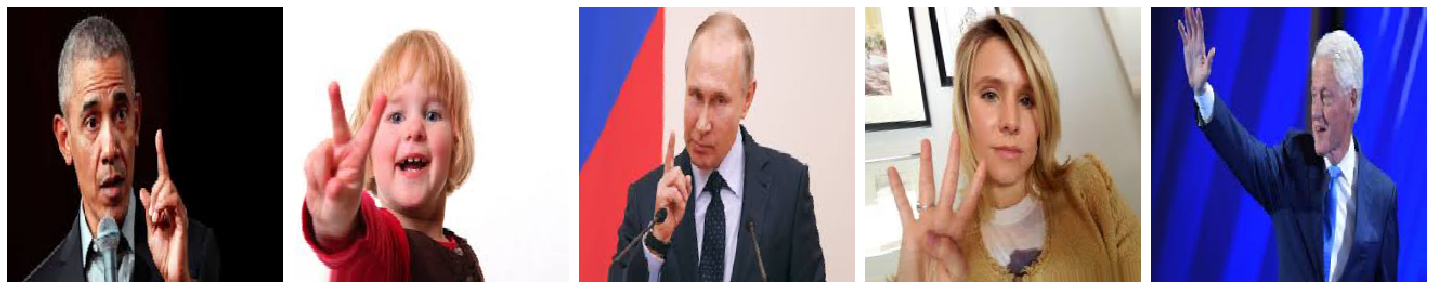

Image 1  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 2  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 3  one-hot encoded class: [1. 0. 0. 0. 0.]
Image 4  one-hot encoded class: [0. 0. 0. 1. 0.]
Image 5  one-hot encoded class: [0. 0. 0. 0. 1.]


In [278]:
plotImages(test1_images[:5], test1_labels[:5])

In [279]:
predictions5 = model.predict_classes(test1_images)

In [281]:
labels1 = []
for result in test1_labels:
    labels1.append(np.where(result == 1)[0][0])
labels1 = np.asarray(labels1)

In [282]:
print(labels1)

[0 1 0 3 4 4 3 4 2 1 4 0 4 0 1 0 1 1 3 4 2 2 4 0 2 2 1 3 3 1 0 3 1 0 1 0 2
 2 3 1 2 3 4 0 3 4 3 2 4 2]


In [283]:
labels1 = labels1+1

In [284]:
print(labels1)

[1 2 1 4 5 5 4 5 3 2 5 1 5 1 2 1 2 2 4 5 3 3 5 1 3 3 2 4 4 2 1 4 2 1 2 1 3
 3 4 2 3 4 5 1 4 5 4 3 5 3]


In [285]:
print(predictions5)

[1 1 4 1 4 1 1 4 1 4 1 1 4 4 4 1 4 4 4 4 1 1 4 1 4 1 1 1 1 4 4 4 4 4 4 2 1
 4 2 1 4 1 1 4 1 3 3 1 1 4]


In [301]:
for x in list(zip(labels1,predictions5)):
    print(x, end=' ')

(1, 1) (2, 1) (1, 4) (4, 1) (5, 4) (5, 1) (4, 1) (5, 4) (3, 1) (2, 4) (5, 1) (1, 1) (5, 4) (1, 4) (2, 4) (1, 1) (2, 4) (2, 4) (4, 4) (5, 4) (3, 1) (3, 1) (5, 4) (1, 1) (3, 4) (3, 1) (2, 1) (4, 1) (4, 1) (2, 4) (1, 4) (4, 4) (2, 4) (1, 4) (2, 4) (1, 2) (3, 1) (3, 4) (4, 2) (2, 1) (3, 4) (4, 1) (5, 1) (1, 4) (4, 1) (5, 3) (4, 3) (3, 1) (5, 1) (3, 4) 

In [302]:
print(classification_report(labels1, predictions5))

              precision    recall  f1-score   support

           1       0.17      0.40      0.24        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.09      0.20      0.12        10
           5       0.00      0.00      0.00        10

    accuracy                           0.12        50
   macro avg       0.05      0.12      0.07        50
weighted avg       0.05      0.12      0.07        50



/Users/bogdan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [304]:
confusion_matrix(labels1, predictions5)

array([[4, 1, 0, 5, 0],
       [3, 0, 0, 7, 0],
       [6, 0, 0, 4, 0],
       [6, 1, 1, 2, 0],
       [4, 0, 1, 5, 0]])

In [305]:
# The result is not good, accuracy is 12%
# There is an obvious bias for predictions for classes 1 and 4,
# therefore I am adding an extra CNN layer for the next model

# Model 6, three Conv2D layers with 16, 32 and 64 filters

In [306]:
model6 = Sequential()

model6.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=image_shape, activation='relu'))
model6.add(MaxPooling2D(pool_size=(3, 3)))
model6.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model6.add(MaxPooling2D(pool_size=(3, 3)))
model6.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model6.add(MaxPooling2D(pool_size=(3, 3)))

model6.add(Flatten())

model6.add(Dense(255))
model6.add(Activation('relu'))

model6.add(Dense(5, activation='softmax'))

model6.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [307]:
model6.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 255, 255, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 85, 85, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5184)             

In [ ]:
history = model6.fit_generator(train_data_gen,
                               epochs=epochs,
                               validation_data=test_data_gen,
                               callbacks=[early_stop])

Epoch 1/10
1005/1005 [==============================] - 2801s 3s/step - loss: 0.7254 - accuracy: 0.7122 - val_loss: 0.3065 - val_accuracy: 0.8885
Epoch 2/10
1005/1005 [==============================] - 3092s 3s/step - loss: 0.2359 - accuracy: 0.9174 - val_loss: 0.1430 - val_accuracy: 0.9510
Epoch 3/10
1005/1005 [==============================] - 2352s 2s/step - loss: 0.1384 - accuracy: 0.9507 - val_loss: 0.0653 - val_accuracy: 0.9773
Epoch 4/10
1005/1005 [==============================] - 2833s 3s/step - loss: 0.0878 - accuracy: 0.9706 - val_loss: 0.0801 - val_accuracy: 0.9731
Epoch 5/10
 171/1005 [====>.........................] - ETA: 27:10 - loss: 0.0718 - accuracy: 0.9781

In [ ]:
model6.save('model6-three-CNN-layers.h5')

In [ ]:
losses_model6 = pd.DataFrame(model5.history.history)
losses_model6

In [ ]:
losses_model6[['loss','val_loss']].plot()

In [ ]:
losses_model6[['accuracy','val_accuracy']].plot()

In [ ]:
model6.metrics_names

In [ ]:
model6.evaluate_generator(test_data_gen)

In [ ]:
test_images, test_labels = next(test_data_gen)

In [ ]:
predictions = model6.predict_classes(test_images)

In [ ]:
labels = []
for result in test_labels:
    labels.append(np.where(result == 1)[0][0])
labels = np.asarray(labels)

print("labels type:", type(labels), "predictions type:", type(predictions))

In [ ]:
for x in list(zip(labels,predictions)):
    print(x, end=' ')

In [ ]:
print(classification_report(labels, predictions))

In [ ]:
confusion_matrix(labels, predictions)

In [ ]:
# So far so good, but the real test is with /test1 data

In [ ]:
test1_dir = './data/test1'
batch_size = 100
test1_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=test1_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH)
                                              )

In [ ]:
test1_images, test1_labels = next(test1_data_gen)

In [ ]:
plotImages(test1_images[:5], test1_labels[:5])

In [ ]:
predictions6 = model.predict_classes(test1_images)

In [ ]:
labels1 = []
for result in test1_labels:
    labels1.append(np.where(result == 1)[0][0])
labels1 = np.asarray(labels1)
labels1 = labels1+1

In [ ]:
print(labels1)

In [ ]:
print(predictions6)

In [ ]:
for x in list(zip(labels1,predictions6)):
    print(x, end=' ')

In [ ]:
print(classification_report(labels1, predictions6))

In [ ]:
confusion_matrix(labels1, predictions6)

In [ ]:
# By using three CNN layers, the results are better, accuracy is now x%

In [61]:
from tensorflow.keras.preprocessing import image

In [62]:
pred_probabilities = model.predict_generator(test_data_gen)

In [63]:
len(pred_probabilities)

4303

In [64]:
pred_probabilities[0:10]

array([[1.00000000e+00, 1.10466909e-20, 1.72471886e-13, 4.07965313e-18,
        9.80287174e-25],
       [1.00000000e+00, 2.85393629e-21, 4.12714012e-20, 7.60418090e-22,
        4.74215832e-29],
       [1.35925828e-28, 2.47001156e-18, 1.00000000e+00, 9.54934489e-17,
        1.34748979e-17],
       [1.00000000e+00, 1.68482106e-16, 8.65511276e-14, 1.04992785e-11,
        2.41589157e-23],
       [1.40129846e-45, 1.79120035e-37, 5.25074614e-24, 4.05572809e-17,
        1.00000000e+00],
       [7.49295903e-11, 2.79768586e-09, 1.00000000e+00, 2.17786320e-13,
        2.74865643e-15],
       [5.26110933e-10, 1.00000000e+00, 1.84564495e-12, 4.24716604e-13,
        5.92119349e-22],
       [9.71112056e-26, 1.89637124e-15, 1.00000000e+00, 2.14806687e-15,
        4.06579496e-18],
       [4.91550262e-26, 5.40953415e-09, 1.00000000e+00, 6.24089972e-13,
        7.38526869e-18],
       [0.00000000e+00, 8.46104854e-34, 2.82812768e-24, 1.01541635e-19,
        1.00000000e+00]], dtype=float32)

In [106]:
test_data_gen.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [107]:
predictions = pred_probabilities > 0.5

In [108]:
predictions

array([[ True, False, False, False, False],
       [ True, False, False, False, False],
       [False, False,  True, False, False],
       ...,
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [False,  True, False, False, False]])

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

In [110]:
print(model.metrics_names)
print(model.evaluate(test_data_gen,verbose=0))

['loss', 'accuracy']
[0.011945993254364165, 0.9967465]


In [114]:
!ls ./data/churchill-0-2.jpeg

./data/churchill-0-2.jpeg


In [115]:
test_image = image.load_img("./data/churchill-0-2.jpeg",target_size=image_shape)

In [116]:
type(test_image)

PIL.Image.Image

In [117]:
test_image = image.img_to_array(test_image)

In [118]:
type(test_image)

numpy.ndarray

In [119]:
test_image.shape

(255, 255, 3)

In [120]:
test_image = test_image/255

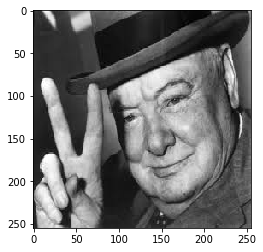

In [121]:
imshow(test_image)

In [122]:
print(test_image.min(), test_image.max())

0.0 1.0


In [123]:
test_image = np.expand_dims(test_image, axis=0)

In [124]:
test_image.shape

(1, 255, 255, 3)

In [125]:
model.predict(test_image)

array([[0.0000000e+00, 3.9780724e-32, 3.0186626e-28, 2.2456944e-35,
        1.0000000e+00]], dtype=float32)

[0. 0. 1. 0. 0.]


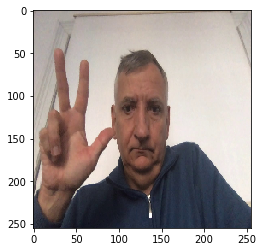

In [144]:
path_test = "./data/test/3/frame3487.jpg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.995 0.005 0.    0.   ]


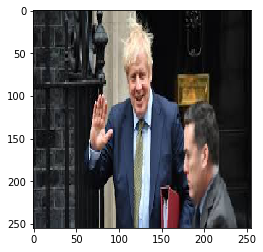

In [139]:
path_test = "./data/johnson-0-5.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 1. 0. 0.]


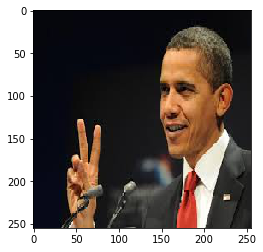

In [140]:
path_test = "./data/obama-0-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 1. 0. 0. 0.]


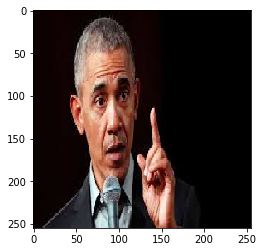

In [141]:
path_test = "./data/obama-1-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 0. 0. 1.]


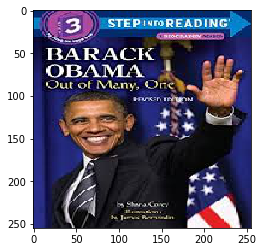

In [142]:
path_test = "./data/obama-1-5.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 1. 0. 0.]


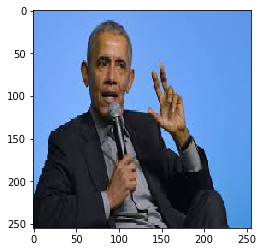

In [143]:
path_test = "./data/obama-2-3.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 1. 0. 0.]


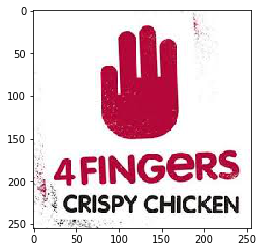

In [145]:
path_test = "./data/4fingers.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.    0.003 0.953 0.044]


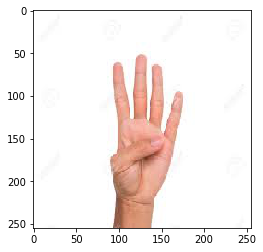

In [146]:
path_test = "./data/4fingers-1.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

In [147]:
# probably it is the background that has a big influence, here the model predicted correctly

[0. 0. 0. 0. 1.]


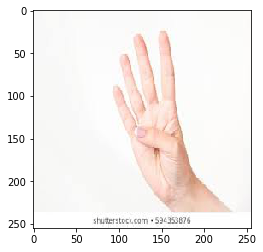

In [149]:
path_test = "./data/4fingers-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 0. 1. 0.]


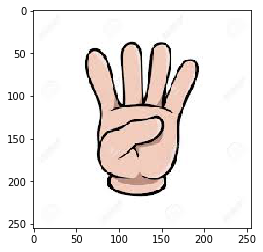

In [150]:
path_test = "./data/4fingers-3.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.022 0.006 0.965 0.007]


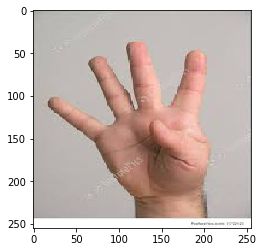

In [151]:
path_test = "./data/4fingers-4.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.    0.014 0.986 0.   ]


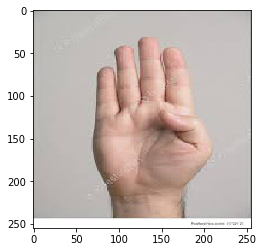

In [152]:
path_test = "./data/4fingers-5.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.    0.133 0.007 0.86 ]


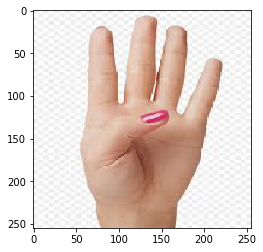

In [153]:
path_test = "./data/4fingers-6.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.032 0.    0.005 0.963]


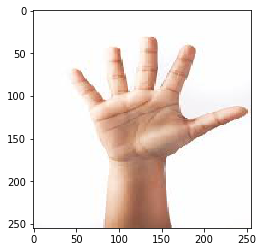

In [154]:
path_test = "./data/5fingers-1.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 1. 0. 0.]


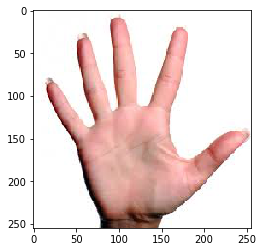

In [155]:
path_test = "./data/5fingers-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.    0.    0.922 0.078]


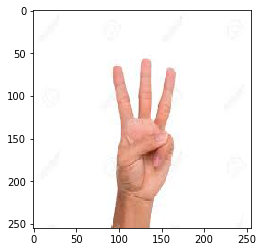

In [156]:
path_test = "./data/3fingers-1.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.    0.    0.018 0.982]


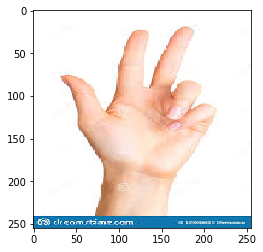

In [157]:
path_test = "./data/3fingers-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 0. 1. 0.]


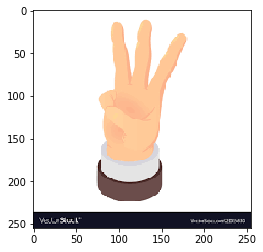

In [159]:
path_test = "./data/3fingers-3.png"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 1. 0. 0. 0.]


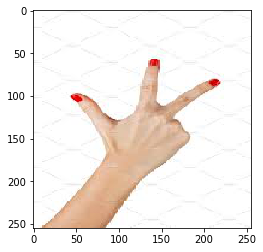

In [160]:
path_test = "./data/3fingers-4.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 0. 0. 1.]


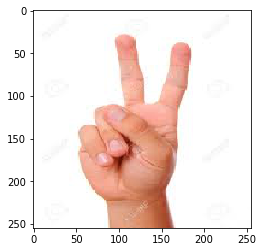

In [161]:
path_test = "./data/2fingers-1.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0. 0. 0. 1. 0.]


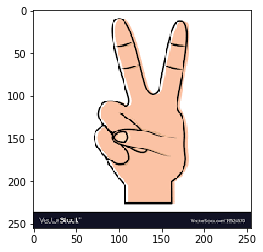

In [163]:
path_test = "./data/2fingers-2.png"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.991 0.    0.009 0.   ]


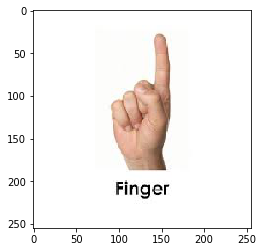

In [164]:
path_test = "./data/1finger-1.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

[0.    0.026 0.    0.974 0.   ]


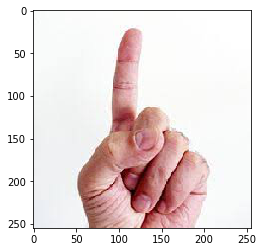

In [165]:
path_test = "./data/1finger-2.jpeg"
test_image = image.load_img(path_test,target_size=image_shape)
test_image = image.img_to_array(test_image)
test_image = test_image/255
imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
list_classes = model.predict(test_image)
print(np.around(list_classes[0],3))

In [104]:
# This function will plot images in the form of a grid with 1 row and 5 columns 
# where images are placed in each column.
def plotImages(images_arr, labels_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    i=1
    for label in labels_arr:
        print("Image", i, " one-hot encoded class:", label)
        i+=1

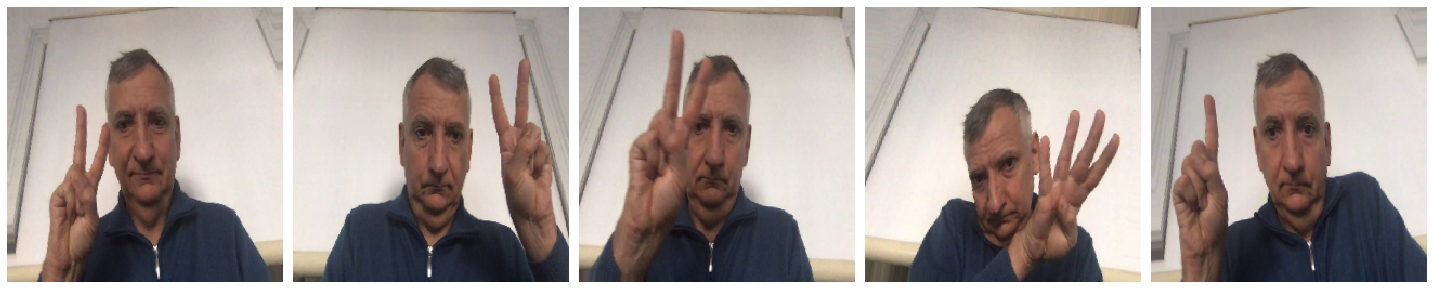

Image 1  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 2  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 3  one-hot encoded class: [0. 1. 0. 0. 0.]
Image 4  one-hot encoded class: [0. 0. 0. 1. 0.]
Image 5  one-hot encoded class: [1. 0. 0. 0. 0.]


In [105]:
plotImages(sample_training_images[:5], sample_training_labels[:5])

In [84]:
a, b = test_data_gen[0]

In [85]:
a.shape

(16, 255, 255, 3)

In [86]:
b

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [83]:
print(np.around(pred_probabilities[0:10],3))

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]]


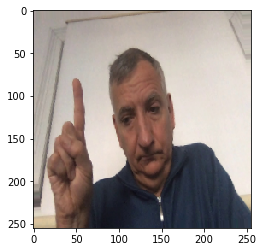

In [87]:
img = a[0,:,:,:]
imshow(img)

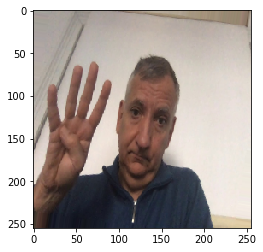

In [88]:
img = a[1,:,:,:]
imshow(img)

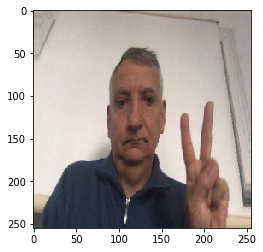

In [89]:
img = a[2,:,:,:]
imshow(img)

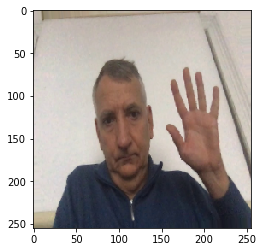

In [90]:
img = a[3,:,:,:]
imshow(img)

In [91]:
sample_training_images, sample_training_labels = next(train_data_gen)

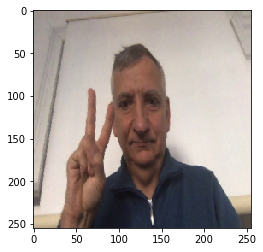

In [93]:
imshow(sample_training_images[0])

In [95]:
sample_training_labels[0]

array([0., 1., 0., 0., 0.], dtype=float32)

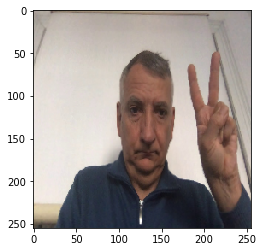

In [96]:
imshow(sample_training_images[1])

In [97]:
sample_training_labels[1]

array([0., 1., 0., 0., 0.], dtype=float32)

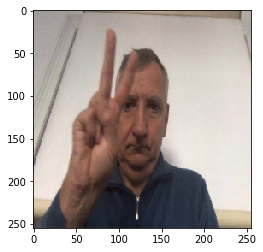

In [98]:
imshow(sample_training_images[2])

In [99]:
sample_training_labels[2]

array([0., 1., 0., 0., 0.], dtype=float32)

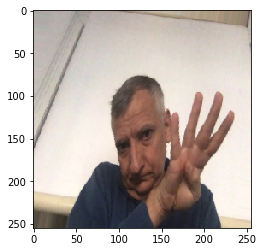

In [101]:
imshow(sample_training_images[3])

In [102]:
sample_training_labels[3]

array([0., 0., 0., 1., 0.], dtype=float32)

In [74]:
param1 = 20
param2 = 180
img_edges = cv2.Canny(img,param1,param2)
plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img)
plt.title('Original image')
plt.subplot(122),plt.imshow(img_edges, cmap='gray')
plt.title('Edge image')

plt.show()

error: OpenCV(3.4.2) /opt/concourse/worker/volumes/live/9523d527-1b9e-48e0-7ed0-a36adde286f0/volume/opencv-suite_1535558719691/work/modules/imgproc/src/canny.cpp:947: error: (-215:Assertion failed) _src.depth() == 0 in function 'Canny'


In [75]:
type(img)

numpy.ndarray

In [77]:
img.shape

(255, 255, 3)

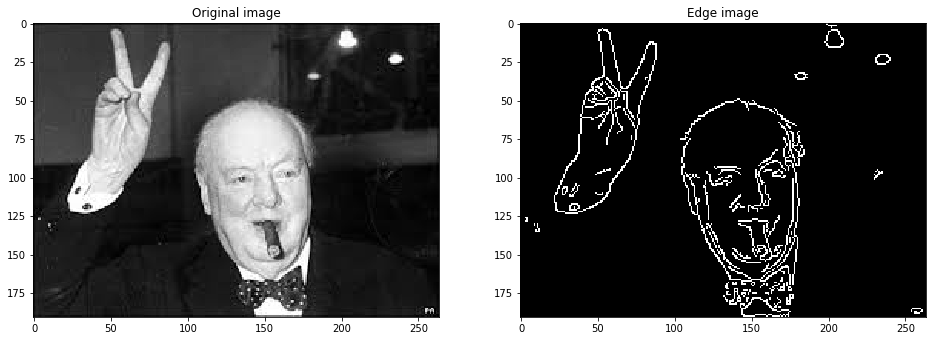

In [150]:
img1 = cv2.imread('./data/churchill-1-2.jpeg',0)
param1 = 120
param2 = 250
img_edges = cv2.Canny(img1,param1,param2)

plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img1, cmap='gray')
plt.title('Original image')
plt.subplot(122),plt.imshow(img_edges, cmap='gray')
plt.title('Edge image')

plt.show()

In [98]:
type(img1)

numpy.ndarray

In [99]:
img1.shape

(720, 1080)

In [100]:
print(img1.min(), img1.max())

12 255


In [94]:
!ls './data/train/2/frame1778.jpg'

./data/train/2/frame1778.jpg


In [177]:
img1 = cv2.imread('./data/train/2/frame1801.jpg',0)

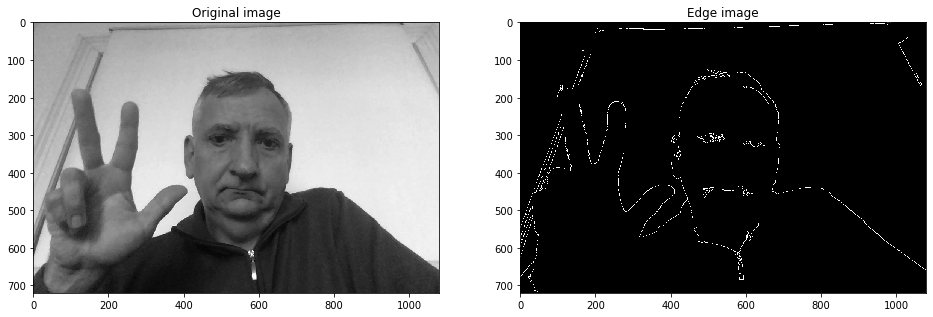

In [178]:
img1 = cv2.imread('./data/train/3/frame3508.jpg',0)
param1 = 20
param2 = 200
img_edges = cv2.Canny(img1,param1,param2)

plt.figure(figsize=(16,12))
plt.subplot(121),plt.imshow(img1, cmap='gray')
plt.title('Original image')
plt.subplot(122),plt.imshow(img_edges, cmap='gray')
plt.title('Edge image')

plt.show()